In [0]:
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In [0]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [0]:
x_train = x_train/127.5-1

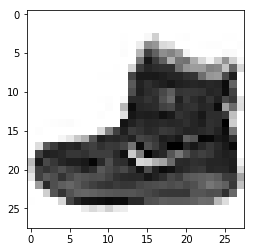

In [38]:
plt.imshow(x_train[0], cmap='Greys')

In [0]:
from keras.layers import Input, Dense, Reshape, Flatten, Dropout
from keras.layers.convolutional import UpSampling2D, Conv2D
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.layers import BatchNormalization, Activation, ZeroPadding2D
from keras.layers.advanced_activations import LeakyReLU

In [0]:
x_train = np.expand_dims(x_train, axis=3)

In [41]:
def create_generator():
  model = Sequential()

  model.add(Dense(256, input_dim=100))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))
  
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(1024))
  model.add(LeakyReLU(0.2))
  model.add(BatchNormalization(momentum=0.8))

  model.add(Dense(np.prod((28, 28, 1)), activation='tanh'))
  model.add(Reshape((28, 28, 1)))

  model.summary()

  noise = Input(shape=(100,))
  img = model(noise)

  return Model(noise, img)

generator = create_generator()
z = Input(shape=(100,))
img = generator(z)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_15 (Dense)             (None, 256)               25856     
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 256)               1024      
_________________________________________________________________
dense_16 (Dense)             (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 512)               2048      
_________________________________________________________________
dense_17 (Dense)             (None, 1024)             

In [42]:
def create_discriminator():
  model = Sequential()

  model.add(Flatten(input_shape=(28, 28, 1)))
  model.add(Dense(512))
  model.add(LeakyReLU(0.2))
  model.add(Dense(256))
  model.add(LeakyReLU(0.2))
  model.add(Dense(1, activation='sigmoid'))
  model.summary()

  img = Input(shape=(28, 28, 1))
  validity = model(img)

  return Model(img, validity)

discriminator = create_discriminator()
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5), metrics=['accuracy'])
discriminator.trainable = False

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 512)               401920    
_________________________________________________________________
leaky_re_lu_14 (LeakyReLU)   (None, 512)               0         
_________________________________________________________________
dense_20 (Dense)             (None, 256)               131328    
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 256)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 1)                 257       
Total params: 533,505
Trainable params: 533,505
Non-trainable params: 0
________________________________________________

In [0]:
validity = discriminator(img)
combined = Model(z, validity)
combined.compile(loss='binary_crossentropy', optimizer=Adam(0.0002, 0.5))

In [0]:
def sample_images(epoch):
  r, c = 5, 5
  noise = np.random.normal(0, 1, (r*c, 100))
  gen_imgs = generator.predict(noise)

  # Rescale images 0 - 1
  gen_imgs = 0.5*gen_imgs+0.5

  fig, axs = plt.subplots(r, c)
  cnt = 0
  for i in range(r):
    for j in range(c):
      axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
      axs[i, j].axis('off')
      cnt += 1
  #fig.savefig("images/%d.png" % epoch)
  plt.show()
  plt.close()

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


0 [D loss: 0.675706, acc.: 53.12%] [G loss: 0.763659]


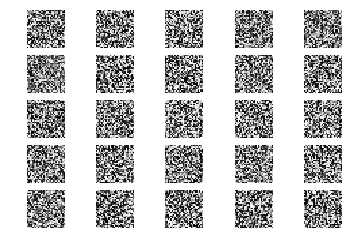

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:493: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


1 [D loss: 0.449560, acc.: 71.88%] [G loss: 0.819890]
2 [D loss: 0.357312, acc.: 79.69%] [G loss: 0.909083]
3 [D loss: 0.311861, acc.: 84.38%] [G loss: 1.020214]
4 [D loss: 0.227186, acc.: 96.88%] [G loss: 1.128130]
5 [D loss: 0.224758, acc.: 95.31%] [G loss: 1.263399]
6 [D loss: 0.178420, acc.: 100.00%] [G loss: 1.439412]
7 [D loss: 0.140495, acc.: 100.00%] [G loss: 1.527002]
8 [D loss: 0.150021, acc.: 100.00%] [G loss: 1.644821]
9 [D loss: 0.139852, acc.: 100.00%] [G loss: 1.789201]
10 [D loss: 0.118631, acc.: 100.00%] [G loss: 1.841442]
11 [D loss: 0.111066, acc.: 100.00%] [G loss: 1.946903]
12 [D loss: 0.115660, acc.: 100.00%] [G loss: 2.051475]
13 [D loss: 0.096699, acc.: 100.00%] [G loss: 2.063040]
14 [D loss: 0.089992, acc.: 100.00%] [G loss: 2.276961]
15 [D loss: 0.082533, acc.: 100.00%] [G loss: 2.111611]
16 [D loss: 0.081156, acc.: 100.00%] [G loss: 2.295261]
17 [D loss: 0.071121, acc.: 100.00%] [G loss: 2.363618]
18 [D loss: 0.071845, acc.: 100.00%] [G loss: 2.495615]
19 [D 

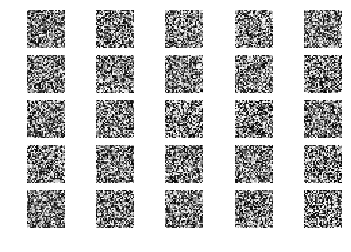

51 [D loss: 0.025066, acc.: 100.00%] [G loss: 3.657246]
52 [D loss: 0.026165, acc.: 100.00%] [G loss: 3.724352]
53 [D loss: 0.022297, acc.: 100.00%] [G loss: 3.629070]
54 [D loss: 0.020589, acc.: 100.00%] [G loss: 3.720670]
55 [D loss: 0.021566, acc.: 100.00%] [G loss: 3.658640]
56 [D loss: 0.031568, acc.: 100.00%] [G loss: 3.815548]
57 [D loss: 0.018823, acc.: 100.00%] [G loss: 3.910045]
58 [D loss: 0.019602, acc.: 100.00%] [G loss: 3.818521]
59 [D loss: 0.019681, acc.: 100.00%] [G loss: 3.807496]
60 [D loss: 0.017783, acc.: 100.00%] [G loss: 4.051598]
61 [D loss: 0.016263, acc.: 100.00%] [G loss: 4.010443]
62 [D loss: 0.015744, acc.: 100.00%] [G loss: 3.967022]
63 [D loss: 0.013003, acc.: 100.00%] [G loss: 3.904155]
64 [D loss: 0.020232, acc.: 100.00%] [G loss: 3.970628]
65 [D loss: 0.021161, acc.: 100.00%] [G loss: 4.048626]
66 [D loss: 0.014113, acc.: 100.00%] [G loss: 4.062007]
67 [D loss: 0.012647, acc.: 100.00%] [G loss: 4.102820]
68 [D loss: 0.034520, acc.: 98.44%] [G loss: 3.9

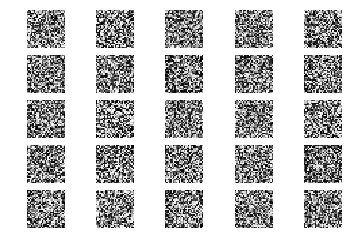

101 [D loss: 0.017158, acc.: 100.00%] [G loss: 4.645831]
102 [D loss: 0.018983, acc.: 100.00%] [G loss: 4.654232]
103 [D loss: 0.018608, acc.: 100.00%] [G loss: 4.572673]
104 [D loss: 0.013542, acc.: 100.00%] [G loss: 4.717843]
105 [D loss: 0.025812, acc.: 100.00%] [G loss: 4.570185]
106 [D loss: 0.016547, acc.: 100.00%] [G loss: 4.345008]
107 [D loss: 0.020116, acc.: 100.00%] [G loss: 4.635327]
108 [D loss: 0.014034, acc.: 100.00%] [G loss: 4.679601]
109 [D loss: 0.016258, acc.: 100.00%] [G loss: 4.671121]
110 [D loss: 0.012709, acc.: 100.00%] [G loss: 4.613765]
111 [D loss: 0.014798, acc.: 100.00%] [G loss: 4.635921]
112 [D loss: 0.011357, acc.: 100.00%] [G loss: 4.690915]
113 [D loss: 0.014315, acc.: 100.00%] [G loss: 4.800169]
114 [D loss: 0.013512, acc.: 100.00%] [G loss: 4.804110]
115 [D loss: 0.012554, acc.: 100.00%] [G loss: 4.626657]
116 [D loss: 0.012723, acc.: 100.00%] [G loss: 4.724264]
117 [D loss: 0.035229, acc.: 100.00%] [G loss: 4.668890]
118 [D loss: 0.021098, acc.: 10

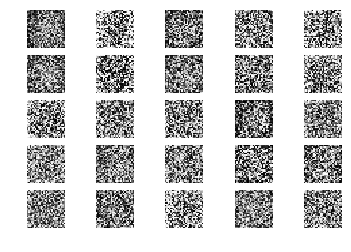

151 [D loss: 0.034703, acc.: 100.00%] [G loss: 5.010716]
152 [D loss: 0.030118, acc.: 100.00%] [G loss: 4.884620]
153 [D loss: 0.043881, acc.: 98.44%] [G loss: 4.988240]
154 [D loss: 0.025235, acc.: 98.44%] [G loss: 4.844795]
155 [D loss: 0.067739, acc.: 96.88%] [G loss: 5.146686]
156 [D loss: 0.025753, acc.: 100.00%] [G loss: 5.135055]
157 [D loss: 0.141248, acc.: 95.31%] [G loss: 4.608746]
158 [D loss: 0.055450, acc.: 100.00%] [G loss: 4.668350]
159 [D loss: 0.014631, acc.: 100.00%] [G loss: 4.885222]
160 [D loss: 0.041693, acc.: 100.00%] [G loss: 5.234719]
161 [D loss: 0.067962, acc.: 96.88%] [G loss: 4.794697]
162 [D loss: 0.040798, acc.: 100.00%] [G loss: 5.188816]
163 [D loss: 0.108920, acc.: 93.75%] [G loss: 4.294692]
164 [D loss: 0.054986, acc.: 100.00%] [G loss: 4.429813]
165 [D loss: 0.057117, acc.: 98.44%] [G loss: 5.123369]
166 [D loss: 0.031561, acc.: 98.44%] [G loss: 5.288645]
167 [D loss: 0.123719, acc.: 93.75%] [G loss: 4.869126]
168 [D loss: 0.108331, acc.: 93.75%] [G 

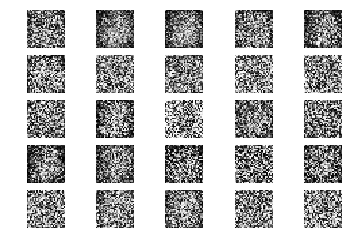

201 [D loss: 0.201355, acc.: 92.19%] [G loss: 3.806185]
202 [D loss: 0.152899, acc.: 90.62%] [G loss: 4.405800]
203 [D loss: 0.195143, acc.: 92.19%] [G loss: 4.407027]
204 [D loss: 0.039335, acc.: 100.00%] [G loss: 4.692862]
205 [D loss: 0.259210, acc.: 89.06%] [G loss: 3.807835]
206 [D loss: 0.078418, acc.: 96.88%] [G loss: 4.376612]
207 [D loss: 0.139516, acc.: 95.31%] [G loss: 4.457973]
208 [D loss: 0.122191, acc.: 98.44%] [G loss: 4.243195]
209 [D loss: 0.127985, acc.: 96.88%] [G loss: 3.844131]
210 [D loss: 0.125534, acc.: 95.31%] [G loss: 4.799612]
211 [D loss: 0.195984, acc.: 95.31%] [G loss: 3.709422]
212 [D loss: 0.071475, acc.: 96.88%] [G loss: 4.252649]
213 [D loss: 0.095061, acc.: 96.88%] [G loss: 4.601709]
214 [D loss: 0.217496, acc.: 89.06%] [G loss: 5.026714]
215 [D loss: 0.035306, acc.: 100.00%] [G loss: 5.594359]
216 [D loss: 0.153113, acc.: 93.75%] [G loss: 4.333563]
217 [D loss: 0.110058, acc.: 96.88%] [G loss: 4.754881]
218 [D loss: 0.130828, acc.: 95.31%] [G loss: 

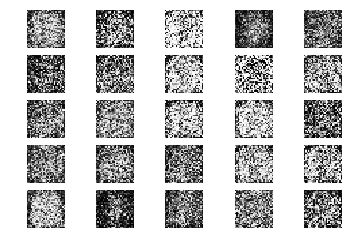

251 [D loss: 0.199583, acc.: 90.62%] [G loss: 4.214158]
252 [D loss: 0.139123, acc.: 95.31%] [G loss: 4.921072]
253 [D loss: 0.159943, acc.: 95.31%] [G loss: 3.577623]
254 [D loss: 0.161478, acc.: 96.88%] [G loss: 3.823710]
255 [D loss: 0.119715, acc.: 96.88%] [G loss: 4.286314]
256 [D loss: 0.246322, acc.: 92.19%] [G loss: 3.601253]
257 [D loss: 0.124016, acc.: 95.31%] [G loss: 4.046453]
258 [D loss: 0.123565, acc.: 96.88%] [G loss: 3.668825]
259 [D loss: 0.163129, acc.: 95.31%] [G loss: 3.716113]
260 [D loss: 0.338607, acc.: 84.38%] [G loss: 3.669303]
261 [D loss: 0.081888, acc.: 100.00%] [G loss: 3.839252]
262 [D loss: 0.095862, acc.: 98.44%] [G loss: 3.514449]
263 [D loss: 0.205937, acc.: 90.62%] [G loss: 4.773229]
264 [D loss: 0.335929, acc.: 87.50%] [G loss: 3.195659]
265 [D loss: 0.301644, acc.: 89.06%] [G loss: 3.658614]
266 [D loss: 0.049003, acc.: 98.44%] [G loss: 4.649220]
267 [D loss: 0.468241, acc.: 81.25%] [G loss: 3.195717]
268 [D loss: 0.150432, acc.: 93.75%] [G loss: 4

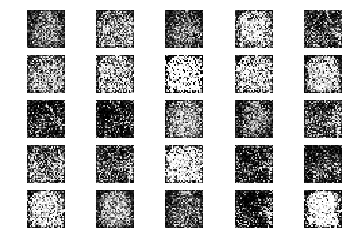

301 [D loss: 0.091986, acc.: 96.88%] [G loss: 4.121665]
302 [D loss: 0.126059, acc.: 95.31%] [G loss: 3.654090]
303 [D loss: 0.202777, acc.: 89.06%] [G loss: 4.272793]
304 [D loss: 0.425042, acc.: 89.06%] [G loss: 3.230252]
305 [D loss: 0.231663, acc.: 93.75%] [G loss: 4.242896]
306 [D loss: 0.212610, acc.: 93.75%] [G loss: 3.020682]
307 [D loss: 0.166843, acc.: 92.19%] [G loss: 4.019773]
308 [D loss: 0.261338, acc.: 89.06%] [G loss: 3.439349]
309 [D loss: 0.274888, acc.: 89.06%] [G loss: 4.164649]
310 [D loss: 0.225423, acc.: 93.75%] [G loss: 3.779412]
311 [D loss: 0.065469, acc.: 100.00%] [G loss: 3.670676]
312 [D loss: 0.405503, acc.: 82.81%] [G loss: 4.513424]
313 [D loss: 0.274722, acc.: 92.19%] [G loss: 3.802165]
314 [D loss: 0.223956, acc.: 92.19%] [G loss: 4.359255]
315 [D loss: 0.427884, acc.: 82.81%] [G loss: 3.833811]
316 [D loss: 0.249033, acc.: 90.62%] [G loss: 4.152691]
317 [D loss: 0.203190, acc.: 92.19%] [G loss: 4.400259]
318 [D loss: 0.500922, acc.: 76.56%] [G loss: 4

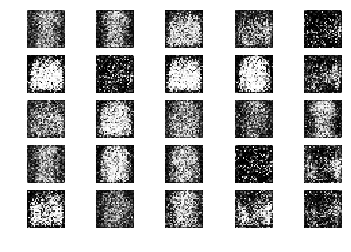

351 [D loss: 0.622724, acc.: 78.12%] [G loss: 2.885087]
352 [D loss: 0.280481, acc.: 87.50%] [G loss: 3.436046]
353 [D loss: 0.737137, acc.: 60.94%] [G loss: 2.097583]
354 [D loss: 0.326233, acc.: 87.50%] [G loss: 2.751567]
355 [D loss: 0.279587, acc.: 89.06%] [G loss: 3.796251]
356 [D loss: 0.468725, acc.: 81.25%] [G loss: 2.763660]
357 [D loss: 0.539843, acc.: 76.56%] [G loss: 2.768811]
358 [D loss: 0.289116, acc.: 93.75%] [G loss: 2.642839]
359 [D loss: 0.323093, acc.: 89.06%] [G loss: 3.188988]
360 [D loss: 0.498329, acc.: 71.88%] [G loss: 2.475773]
361 [D loss: 0.501816, acc.: 78.12%] [G loss: 2.631041]
362 [D loss: 0.740290, acc.: 75.00%] [G loss: 2.205835]
363 [D loss: 0.867727, acc.: 68.75%] [G loss: 2.828838]
364 [D loss: 0.436041, acc.: 84.38%] [G loss: 2.740752]
365 [D loss: 0.548705, acc.: 78.12%] [G loss: 2.808764]
366 [D loss: 0.306105, acc.: 92.19%] [G loss: 2.375389]
367 [D loss: 0.672886, acc.: 71.88%] [G loss: 2.804344]
368 [D loss: 0.521936, acc.: 78.12%] [G loss: 2.

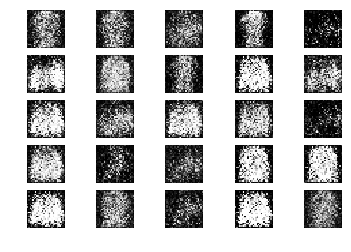

401 [D loss: 0.559503, acc.: 73.44%] [G loss: 1.833809]
402 [D loss: 0.474832, acc.: 78.12%] [G loss: 2.184218]
403 [D loss: 0.868586, acc.: 60.94%] [G loss: 1.301571]
404 [D loss: 0.393796, acc.: 78.12%] [G loss: 1.985297]
405 [D loss: 0.527504, acc.: 75.00%] [G loss: 2.042957]
406 [D loss: 0.772364, acc.: 62.50%] [G loss: 1.675711]
407 [D loss: 0.522517, acc.: 68.75%] [G loss: 1.969315]
408 [D loss: 0.640325, acc.: 68.75%] [G loss: 1.887644]
409 [D loss: 0.637731, acc.: 64.06%] [G loss: 1.466351]
410 [D loss: 0.449266, acc.: 73.44%] [G loss: 1.612438]
411 [D loss: 0.451750, acc.: 90.62%] [G loss: 1.939489]
412 [D loss: 0.763315, acc.: 56.25%] [G loss: 1.459441]
413 [D loss: 0.505396, acc.: 78.12%] [G loss: 1.734453]
414 [D loss: 0.830261, acc.: 60.94%] [G loss: 1.648412]
415 [D loss: 0.641649, acc.: 76.56%] [G loss: 1.996003]
416 [D loss: 0.496194, acc.: 70.31%] [G loss: 1.561847]
417 [D loss: 0.556765, acc.: 75.00%] [G loss: 1.743016]
418 [D loss: 0.604678, acc.: 68.75%] [G loss: 1.

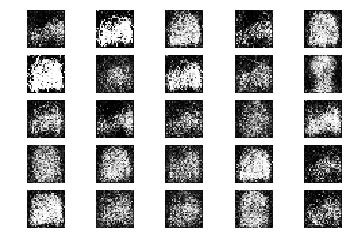

451 [D loss: 0.592171, acc.: 78.12%] [G loss: 1.370005]
452 [D loss: 0.677115, acc.: 65.62%] [G loss: 1.250680]
453 [D loss: 0.544751, acc.: 73.44%] [G loss: 1.385484]
454 [D loss: 0.502161, acc.: 76.56%] [G loss: 1.380951]
455 [D loss: 0.844329, acc.: 53.12%] [G loss: 1.182988]
456 [D loss: 0.550678, acc.: 71.88%] [G loss: 1.507285]
457 [D loss: 0.578431, acc.: 71.88%] [G loss: 1.337907]
458 [D loss: 0.627855, acc.: 70.31%] [G loss: 1.432190]
459 [D loss: 0.616987, acc.: 75.00%] [G loss: 1.315098]
460 [D loss: 0.549285, acc.: 76.56%] [G loss: 1.241789]
461 [D loss: 0.603520, acc.: 70.31%] [G loss: 1.314033]
462 [D loss: 0.592865, acc.: 70.31%] [G loss: 1.474651]
463 [D loss: 0.661780, acc.: 65.62%] [G loss: 1.471978]
464 [D loss: 0.671271, acc.: 68.75%] [G loss: 1.417756]
465 [D loss: 0.562528, acc.: 70.31%] [G loss: 1.258995]
466 [D loss: 0.653816, acc.: 64.06%] [G loss: 1.334097]
467 [D loss: 0.722699, acc.: 51.56%] [G loss: 1.211347]
468 [D loss: 0.710224, acc.: 67.19%] [G loss: 1.

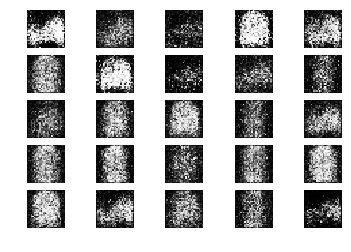

501 [D loss: 0.658053, acc.: 60.94%] [G loss: 1.159137]
502 [D loss: 0.675508, acc.: 71.88%] [G loss: 1.130639]
503 [D loss: 0.520884, acc.: 78.12%] [G loss: 1.128080]
504 [D loss: 0.560261, acc.: 71.88%] [G loss: 1.190671]
505 [D loss: 0.657516, acc.: 65.62%] [G loss: 1.153668]
506 [D loss: 0.530717, acc.: 73.44%] [G loss: 1.258175]
507 [D loss: 0.547548, acc.: 68.75%] [G loss: 1.271192]
508 [D loss: 0.581345, acc.: 70.31%] [G loss: 1.265283]
509 [D loss: 0.587548, acc.: 70.31%] [G loss: 1.216319]
510 [D loss: 0.550800, acc.: 68.75%] [G loss: 1.165631]
511 [D loss: 0.697492, acc.: 59.38%] [G loss: 1.115941]
512 [D loss: 0.497674, acc.: 84.38%] [G loss: 1.275755]
513 [D loss: 0.626659, acc.: 68.75%] [G loss: 1.205972]
514 [D loss: 0.597762, acc.: 62.50%] [G loss: 1.185153]
515 [D loss: 0.515906, acc.: 75.00%] [G loss: 1.085013]
516 [D loss: 0.570342, acc.: 76.56%] [G loss: 1.230926]
517 [D loss: 0.534760, acc.: 82.81%] [G loss: 1.317631]
518 [D loss: 0.588679, acc.: 70.31%] [G loss: 1.

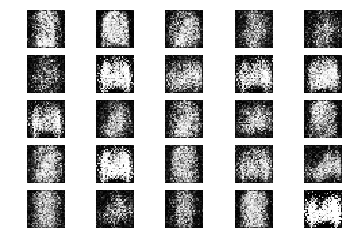

551 [D loss: 0.575117, acc.: 75.00%] [G loss: 1.331933]
552 [D loss: 0.606939, acc.: 65.62%] [G loss: 1.075259]
553 [D loss: 0.575184, acc.: 71.88%] [G loss: 0.961484]
554 [D loss: 0.587228, acc.: 64.06%] [G loss: 1.140171]
555 [D loss: 0.517404, acc.: 76.56%] [G loss: 1.118385]
556 [D loss: 0.779909, acc.: 56.25%] [G loss: 0.991267]
557 [D loss: 0.528623, acc.: 76.56%] [G loss: 1.090186]
558 [D loss: 0.603158, acc.: 68.75%] [G loss: 1.050642]
559 [D loss: 0.630013, acc.: 59.38%] [G loss: 0.990311]
560 [D loss: 0.612829, acc.: 65.62%] [G loss: 1.101690]
561 [D loss: 0.643288, acc.: 59.38%] [G loss: 1.027299]
562 [D loss: 0.556451, acc.: 73.44%] [G loss: 1.082085]
563 [D loss: 0.584853, acc.: 65.62%] [G loss: 1.072822]
564 [D loss: 0.588326, acc.: 67.19%] [G loss: 1.148414]
565 [D loss: 0.645299, acc.: 60.94%] [G loss: 1.176296]
566 [D loss: 0.540947, acc.: 70.31%] [G loss: 1.149972]
567 [D loss: 0.633298, acc.: 64.06%] [G loss: 1.154079]
568 [D loss: 0.672109, acc.: 59.38%] [G loss: 0.

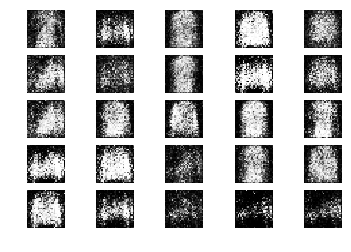

601 [D loss: 0.591102, acc.: 70.31%] [G loss: 1.053718]
602 [D loss: 0.565322, acc.: 71.88%] [G loss: 1.152782]
603 [D loss: 0.684010, acc.: 64.06%] [G loss: 1.166898]
604 [D loss: 0.581423, acc.: 75.00%] [G loss: 1.132318]
605 [D loss: 0.588172, acc.: 68.75%] [G loss: 1.126590]
606 [D loss: 0.571517, acc.: 68.75%] [G loss: 1.110604]
607 [D loss: 0.643067, acc.: 59.38%] [G loss: 1.097784]
608 [D loss: 0.624858, acc.: 67.19%] [G loss: 1.129347]
609 [D loss: 0.509006, acc.: 79.69%] [G loss: 1.128933]
610 [D loss: 0.551324, acc.: 81.25%] [G loss: 1.112727]
611 [D loss: 0.593315, acc.: 68.75%] [G loss: 1.139493]
612 [D loss: 0.541809, acc.: 73.44%] [G loss: 1.073322]
613 [D loss: 0.616921, acc.: 70.31%] [G loss: 1.117519]
614 [D loss: 0.548048, acc.: 71.88%] [G loss: 1.181184]
615 [D loss: 0.603767, acc.: 73.44%] [G loss: 1.147988]
616 [D loss: 0.537370, acc.: 81.25%] [G loss: 1.093116]
617 [D loss: 0.516573, acc.: 75.00%] [G loss: 1.163720]
618 [D loss: 0.619419, acc.: 57.81%] [G loss: 1.

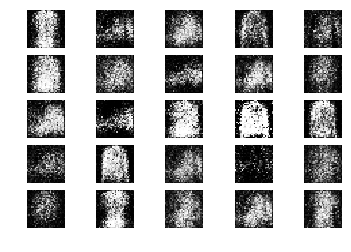

651 [D loss: 0.541775, acc.: 75.00%] [G loss: 1.141374]
652 [D loss: 0.475819, acc.: 82.81%] [G loss: 1.313012]
653 [D loss: 0.573434, acc.: 71.88%] [G loss: 1.204826]
654 [D loss: 0.649094, acc.: 64.06%] [G loss: 1.070906]
655 [D loss: 0.605775, acc.: 70.31%] [G loss: 1.118887]
656 [D loss: 0.627267, acc.: 65.62%] [G loss: 1.132157]
657 [D loss: 0.619755, acc.: 75.00%] [G loss: 1.039452]
658 [D loss: 0.573947, acc.: 71.88%] [G loss: 1.027310]
659 [D loss: 0.578805, acc.: 70.31%] [G loss: 1.103380]
660 [D loss: 0.511922, acc.: 84.38%] [G loss: 1.118993]
661 [D loss: 0.521571, acc.: 70.31%] [G loss: 1.200451]
662 [D loss: 0.549706, acc.: 73.44%] [G loss: 1.158080]
663 [D loss: 0.526812, acc.: 81.25%] [G loss: 1.177320]
664 [D loss: 0.571646, acc.: 73.44%] [G loss: 1.023475]
665 [D loss: 0.532210, acc.: 76.56%] [G loss: 1.082538]
666 [D loss: 0.553732, acc.: 68.75%] [G loss: 1.075722]
667 [D loss: 0.603964, acc.: 67.19%] [G loss: 1.140863]
668 [D loss: 0.534052, acc.: 76.56%] [G loss: 1.

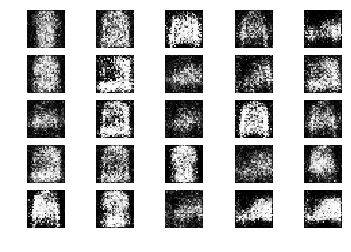

701 [D loss: 0.557951, acc.: 71.88%] [G loss: 1.157425]
702 [D loss: 0.700685, acc.: 45.31%] [G loss: 1.020731]
703 [D loss: 0.544980, acc.: 70.31%] [G loss: 1.156347]
704 [D loss: 0.656757, acc.: 67.19%] [G loss: 1.076824]
705 [D loss: 0.511268, acc.: 73.44%] [G loss: 0.947182]
706 [D loss: 0.582092, acc.: 67.19%] [G loss: 1.126636]
707 [D loss: 0.570494, acc.: 71.88%] [G loss: 1.032023]
708 [D loss: 0.540971, acc.: 68.75%] [G loss: 0.998328]
709 [D loss: 0.618949, acc.: 62.50%] [G loss: 0.995753]
710 [D loss: 0.558930, acc.: 64.06%] [G loss: 1.069263]
711 [D loss: 0.575846, acc.: 71.88%] [G loss: 1.214445]
712 [D loss: 0.507943, acc.: 81.25%] [G loss: 1.206192]
713 [D loss: 0.513213, acc.: 76.56%] [G loss: 1.096493]
714 [D loss: 0.694665, acc.: 60.94%] [G loss: 1.055601]
715 [D loss: 0.592668, acc.: 64.06%] [G loss: 1.168738]
716 [D loss: 0.541632, acc.: 71.88%] [G loss: 1.207936]
717 [D loss: 0.634526, acc.: 60.94%] [G loss: 1.166475]
718 [D loss: 0.580990, acc.: 68.75%] [G loss: 0.

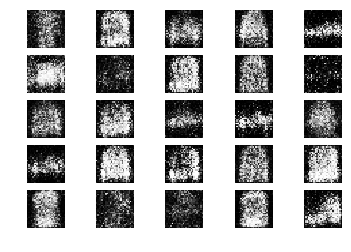

751 [D loss: 0.519708, acc.: 79.69%] [G loss: 0.959677]
752 [D loss: 0.548983, acc.: 73.44%] [G loss: 1.037711]
753 [D loss: 0.525422, acc.: 76.56%] [G loss: 1.179769]
754 [D loss: 0.644860, acc.: 59.38%] [G loss: 1.202001]
755 [D loss: 0.492732, acc.: 84.38%] [G loss: 1.111015]
756 [D loss: 0.496959, acc.: 75.00%] [G loss: 1.158845]
757 [D loss: 0.640680, acc.: 68.75%] [G loss: 1.166346]
758 [D loss: 0.578648, acc.: 75.00%] [G loss: 1.046416]
759 [D loss: 0.574703, acc.: 71.88%] [G loss: 1.039609]
760 [D loss: 0.525854, acc.: 82.81%] [G loss: 1.059641]
761 [D loss: 0.594396, acc.: 70.31%] [G loss: 1.088091]
762 [D loss: 0.621045, acc.: 65.62%] [G loss: 1.026822]
763 [D loss: 0.503691, acc.: 82.81%] [G loss: 1.088436]
764 [D loss: 0.590080, acc.: 70.31%] [G loss: 0.984103]
765 [D loss: 0.671169, acc.: 56.25%] [G loss: 1.035580]
766 [D loss: 0.511020, acc.: 73.44%] [G loss: 1.028170]
767 [D loss: 0.560879, acc.: 62.50%] [G loss: 1.236934]
768 [D loss: 0.561960, acc.: 71.88%] [G loss: 1.

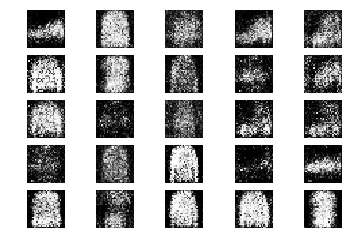

801 [D loss: 0.496390, acc.: 76.56%] [G loss: 1.190063]
802 [D loss: 0.607115, acc.: 67.19%] [G loss: 1.032418]
803 [D loss: 0.487586, acc.: 78.12%] [G loss: 1.103239]
804 [D loss: 0.573313, acc.: 71.88%] [G loss: 1.202969]
805 [D loss: 0.621591, acc.: 67.19%] [G loss: 1.037016]
806 [D loss: 0.511891, acc.: 78.12%] [G loss: 1.029306]
807 [D loss: 0.562182, acc.: 70.31%] [G loss: 1.123485]
808 [D loss: 0.576959, acc.: 71.88%] [G loss: 1.203336]
809 [D loss: 0.530388, acc.: 75.00%] [G loss: 1.076154]
810 [D loss: 0.560430, acc.: 71.88%] [G loss: 1.041263]
811 [D loss: 0.554851, acc.: 75.00%] [G loss: 1.005404]
812 [D loss: 0.541124, acc.: 75.00%] [G loss: 1.140756]
813 [D loss: 0.592667, acc.: 67.19%] [G loss: 1.069523]
814 [D loss: 0.459328, acc.: 89.06%] [G loss: 1.072327]
815 [D loss: 0.534147, acc.: 79.69%] [G loss: 1.032812]
816 [D loss: 0.573309, acc.: 73.44%] [G loss: 1.169420]
817 [D loss: 0.586776, acc.: 64.06%] [G loss: 1.094016]
818 [D loss: 0.447993, acc.: 82.81%] [G loss: 1.

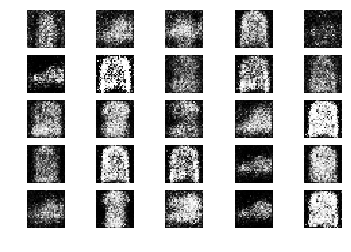

851 [D loss: 0.497119, acc.: 73.44%] [G loss: 0.930614]
852 [D loss: 0.552098, acc.: 71.88%] [G loss: 1.058006]
853 [D loss: 0.490557, acc.: 73.44%] [G loss: 1.098119]
854 [D loss: 0.582213, acc.: 68.75%] [G loss: 1.143771]
855 [D loss: 0.561379, acc.: 65.62%] [G loss: 1.174718]
856 [D loss: 0.547321, acc.: 71.88%] [G loss: 1.105193]
857 [D loss: 0.474285, acc.: 89.06%] [G loss: 1.137794]
858 [D loss: 0.570801, acc.: 71.88%] [G loss: 1.032270]
859 [D loss: 0.522153, acc.: 73.44%] [G loss: 1.183415]
860 [D loss: 0.583289, acc.: 68.75%] [G loss: 1.092394]
861 [D loss: 0.497988, acc.: 79.69%] [G loss: 1.230330]
862 [D loss: 0.630206, acc.: 62.50%] [G loss: 1.164932]
863 [D loss: 0.515298, acc.: 71.88%] [G loss: 1.157116]
864 [D loss: 0.566536, acc.: 70.31%] [G loss: 1.183642]
865 [D loss: 0.586700, acc.: 70.31%] [G loss: 1.105380]
866 [D loss: 0.657614, acc.: 59.38%] [G loss: 1.146463]
867 [D loss: 0.549219, acc.: 78.12%] [G loss: 1.212164]
868 [D loss: 0.548479, acc.: 78.12%] [G loss: 1.

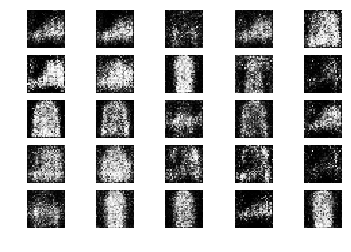

901 [D loss: 0.575177, acc.: 70.31%] [G loss: 1.164006]
902 [D loss: 0.631011, acc.: 64.06%] [G loss: 0.959536]
903 [D loss: 0.539110, acc.: 73.44%] [G loss: 1.018374]
904 [D loss: 0.667455, acc.: 60.94%] [G loss: 0.984169]
905 [D loss: 0.654818, acc.: 60.94%] [G loss: 1.050946]
906 [D loss: 0.675740, acc.: 62.50%] [G loss: 1.109035]
907 [D loss: 0.574930, acc.: 67.19%] [G loss: 1.044762]
908 [D loss: 0.577022, acc.: 68.75%] [G loss: 0.973024]
909 [D loss: 0.676494, acc.: 53.12%] [G loss: 1.111757]
910 [D loss: 0.569770, acc.: 75.00%] [G loss: 1.146061]
911 [D loss: 0.608139, acc.: 68.75%] [G loss: 1.022476]
912 [D loss: 0.594411, acc.: 64.06%] [G loss: 1.009467]
913 [D loss: 0.621721, acc.: 70.31%] [G loss: 0.998821]
914 [D loss: 0.659707, acc.: 57.81%] [G loss: 1.075594]
915 [D loss: 0.611064, acc.: 57.81%] [G loss: 1.083931]
916 [D loss: 0.545103, acc.: 70.31%] [G loss: 1.145635]
917 [D loss: 0.625069, acc.: 65.62%] [G loss: 1.086493]
918 [D loss: 0.645684, acc.: 64.06%] [G loss: 1.

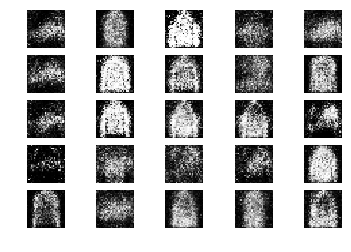

951 [D loss: 0.565689, acc.: 70.31%] [G loss: 1.094850]
952 [D loss: 0.525287, acc.: 76.56%] [G loss: 1.038572]
953 [D loss: 0.614607, acc.: 65.62%] [G loss: 0.963598]
954 [D loss: 0.579563, acc.: 73.44%] [G loss: 0.962968]
955 [D loss: 0.492964, acc.: 75.00%] [G loss: 1.129931]
956 [D loss: 0.687308, acc.: 60.94%] [G loss: 1.079530]
957 [D loss: 0.606055, acc.: 62.50%] [G loss: 1.126741]
958 [D loss: 0.543921, acc.: 67.19%] [G loss: 0.991094]
959 [D loss: 0.628843, acc.: 65.62%] [G loss: 1.023834]
960 [D loss: 0.558538, acc.: 73.44%] [G loss: 0.958886]
961 [D loss: 0.589524, acc.: 73.44%] [G loss: 0.981480]
962 [D loss: 0.569124, acc.: 65.62%] [G loss: 1.113482]
963 [D loss: 0.493504, acc.: 79.69%] [G loss: 1.164711]
964 [D loss: 0.702369, acc.: 57.81%] [G loss: 1.011671]
965 [D loss: 0.637620, acc.: 62.50%] [G loss: 1.047224]
966 [D loss: 0.560278, acc.: 70.31%] [G loss: 1.004041]
967 [D loss: 0.579381, acc.: 60.94%] [G loss: 1.046934]
968 [D loss: 0.661018, acc.: 57.81%] [G loss: 0.

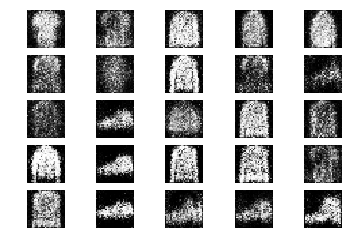

1001 [D loss: 0.556880, acc.: 75.00%] [G loss: 1.067288]
1002 [D loss: 0.589839, acc.: 64.06%] [G loss: 1.045423]
1003 [D loss: 0.532740, acc.: 76.56%] [G loss: 0.982732]
1004 [D loss: 0.628983, acc.: 60.94%] [G loss: 1.026980]
1005 [D loss: 0.699826, acc.: 67.19%] [G loss: 0.977914]
1006 [D loss: 0.538789, acc.: 76.56%] [G loss: 0.873754]
1007 [D loss: 0.561291, acc.: 65.62%] [G loss: 0.908762]
1008 [D loss: 0.630744, acc.: 56.25%] [G loss: 0.909091]
1009 [D loss: 0.561388, acc.: 75.00%] [G loss: 1.029938]
1010 [D loss: 0.613824, acc.: 67.19%] [G loss: 0.999371]
1011 [D loss: 0.614745, acc.: 65.62%] [G loss: 1.068776]
1012 [D loss: 0.617249, acc.: 64.06%] [G loss: 0.969630]
1013 [D loss: 0.680462, acc.: 62.50%] [G loss: 1.040440]
1014 [D loss: 0.609741, acc.: 60.94%] [G loss: 0.936415]
1015 [D loss: 0.658418, acc.: 57.81%] [G loss: 1.005827]
1016 [D loss: 0.650469, acc.: 56.25%] [G loss: 0.914047]
1017 [D loss: 0.682164, acc.: 53.12%] [G loss: 0.958183]
1018 [D loss: 0.576755, acc.: 7

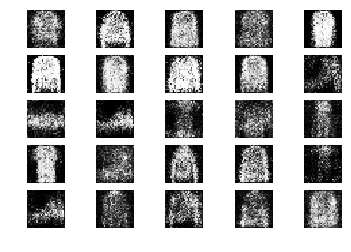

1051 [D loss: 0.596265, acc.: 68.75%] [G loss: 0.995065]
1052 [D loss: 0.659060, acc.: 62.50%] [G loss: 0.872102]
1053 [D loss: 0.691378, acc.: 50.00%] [G loss: 1.054974]
1054 [D loss: 0.618071, acc.: 68.75%] [G loss: 0.923680]
1055 [D loss: 0.585218, acc.: 73.44%] [G loss: 0.931452]
1056 [D loss: 0.546733, acc.: 82.81%] [G loss: 1.056415]
1057 [D loss: 0.667484, acc.: 60.94%] [G loss: 0.995168]
1058 [D loss: 0.643860, acc.: 57.81%] [G loss: 1.001340]
1059 [D loss: 0.578193, acc.: 73.44%] [G loss: 1.016687]
1060 [D loss: 0.601498, acc.: 67.19%] [G loss: 0.952943]
1061 [D loss: 0.565334, acc.: 65.62%] [G loss: 0.973177]
1062 [D loss: 0.546606, acc.: 73.44%] [G loss: 0.947431]
1063 [D loss: 0.698715, acc.: 56.25%] [G loss: 0.853728]
1064 [D loss: 0.625534, acc.: 60.94%] [G loss: 0.779423]
1065 [D loss: 0.534310, acc.: 79.69%] [G loss: 0.913815]
1066 [D loss: 0.621928, acc.: 62.50%] [G loss: 0.940465]
1067 [D loss: 0.600370, acc.: 65.62%] [G loss: 0.907467]
1068 [D loss: 0.553357, acc.: 7

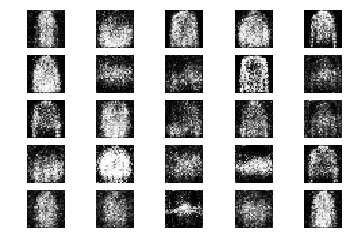

1101 [D loss: 0.601553, acc.: 73.44%] [G loss: 0.839019]
1102 [D loss: 0.628941, acc.: 62.50%] [G loss: 1.118525]
1103 [D loss: 0.618837, acc.: 71.88%] [G loss: 1.053661]
1104 [D loss: 0.679642, acc.: 62.50%] [G loss: 1.140234]
1105 [D loss: 0.699623, acc.: 59.38%] [G loss: 0.926401]
1106 [D loss: 0.603741, acc.: 71.88%] [G loss: 0.907913]
1107 [D loss: 0.590519, acc.: 75.00%] [G loss: 0.994445]
1108 [D loss: 0.554248, acc.: 76.56%] [G loss: 0.988204]
1109 [D loss: 0.609187, acc.: 62.50%] [G loss: 0.919421]
1110 [D loss: 0.625520, acc.: 67.19%] [G loss: 1.042914]
1111 [D loss: 0.591963, acc.: 67.19%] [G loss: 0.997095]
1112 [D loss: 0.592961, acc.: 71.88%] [G loss: 1.017446]
1113 [D loss: 0.536576, acc.: 73.44%] [G loss: 1.036669]
1114 [D loss: 0.664315, acc.: 62.50%] [G loss: 1.009954]
1115 [D loss: 0.565699, acc.: 67.19%] [G loss: 1.034049]
1116 [D loss: 0.682340, acc.: 57.81%] [G loss: 0.960987]
1117 [D loss: 0.608764, acc.: 68.75%] [G loss: 0.943572]
1118 [D loss: 0.605112, acc.: 6

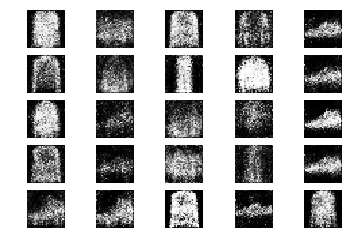

1151 [D loss: 0.617076, acc.: 59.38%] [G loss: 1.043282]
1152 [D loss: 0.652561, acc.: 65.62%] [G loss: 0.908338]
1153 [D loss: 0.584633, acc.: 68.75%] [G loss: 0.901044]
1154 [D loss: 0.625769, acc.: 59.38%] [G loss: 0.877411]
1155 [D loss: 0.665336, acc.: 59.38%] [G loss: 0.944475]
1156 [D loss: 0.615274, acc.: 75.00%] [G loss: 0.891150]
1157 [D loss: 0.579541, acc.: 75.00%] [G loss: 0.841414]
1158 [D loss: 0.608534, acc.: 70.31%] [G loss: 0.862584]
1159 [D loss: 0.558707, acc.: 76.56%] [G loss: 1.022038]
1160 [D loss: 0.742692, acc.: 53.12%] [G loss: 1.009117]
1161 [D loss: 0.579651, acc.: 70.31%] [G loss: 1.069966]
1162 [D loss: 0.585634, acc.: 78.12%] [G loss: 1.031921]
1163 [D loss: 0.599670, acc.: 62.50%] [G loss: 1.040959]
1164 [D loss: 0.593741, acc.: 75.00%] [G loss: 0.936052]
1165 [D loss: 0.636949, acc.: 62.50%] [G loss: 0.898975]
1166 [D loss: 0.685000, acc.: 59.38%] [G loss: 0.855876]
1167 [D loss: 0.659265, acc.: 54.69%] [G loss: 0.862776]
1168 [D loss: 0.722529, acc.: 5

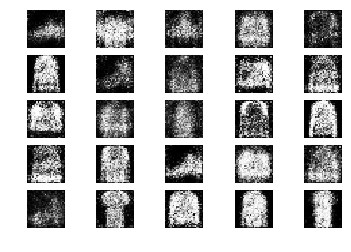

1201 [D loss: 0.635404, acc.: 57.81%] [G loss: 0.908957]
1202 [D loss: 0.590580, acc.: 67.19%] [G loss: 0.970213]
1203 [D loss: 0.614678, acc.: 62.50%] [G loss: 0.841333]
1204 [D loss: 0.663440, acc.: 60.94%] [G loss: 1.034439]
1205 [D loss: 0.642932, acc.: 54.69%] [G loss: 0.992896]
1206 [D loss: 0.588957, acc.: 70.31%] [G loss: 0.904874]
1207 [D loss: 0.643743, acc.: 64.06%] [G loss: 0.980422]
1208 [D loss: 0.598683, acc.: 68.75%] [G loss: 0.901045]
1209 [D loss: 0.630770, acc.: 68.75%] [G loss: 0.937173]
1210 [D loss: 0.638721, acc.: 68.75%] [G loss: 0.926702]
1211 [D loss: 0.573980, acc.: 71.88%] [G loss: 0.878346]
1212 [D loss: 0.563887, acc.: 71.88%] [G loss: 0.922846]
1213 [D loss: 0.601809, acc.: 65.62%] [G loss: 0.876428]
1214 [D loss: 0.681137, acc.: 62.50%] [G loss: 0.957238]
1215 [D loss: 0.631468, acc.: 64.06%] [G loss: 0.929215]
1216 [D loss: 0.561226, acc.: 76.56%] [G loss: 0.922333]
1217 [D loss: 0.586656, acc.: 67.19%] [G loss: 0.998166]
1218 [D loss: 0.598922, acc.: 7

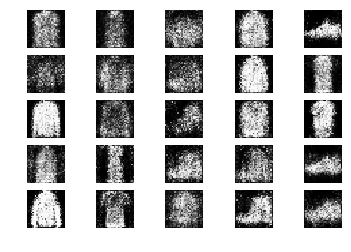

1251 [D loss: 0.584573, acc.: 71.88%] [G loss: 0.834813]
1252 [D loss: 0.574011, acc.: 70.31%] [G loss: 0.876589]
1253 [D loss: 0.549710, acc.: 71.88%] [G loss: 0.918766]
1254 [D loss: 0.666281, acc.: 53.12%] [G loss: 0.847593]
1255 [D loss: 0.596720, acc.: 67.19%] [G loss: 0.925965]
1256 [D loss: 0.593091, acc.: 65.62%] [G loss: 0.892781]
1257 [D loss: 0.645180, acc.: 60.94%] [G loss: 0.962088]
1258 [D loss: 0.601905, acc.: 71.88%] [G loss: 0.898154]
1259 [D loss: 0.572455, acc.: 75.00%] [G loss: 0.888034]
1260 [D loss: 0.670373, acc.: 62.50%] [G loss: 0.889712]
1261 [D loss: 0.609809, acc.: 65.62%] [G loss: 0.963181]
1262 [D loss: 0.669757, acc.: 57.81%] [G loss: 0.984908]
1263 [D loss: 0.628912, acc.: 64.06%] [G loss: 1.025731]
1264 [D loss: 0.597390, acc.: 67.19%] [G loss: 0.925240]
1265 [D loss: 0.593982, acc.: 68.75%] [G loss: 0.926596]
1266 [D loss: 0.588130, acc.: 71.88%] [G loss: 1.058473]
1267 [D loss: 0.659950, acc.: 60.94%] [G loss: 0.911161]
1268 [D loss: 0.599024, acc.: 6

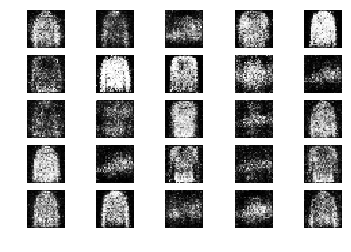

1301 [D loss: 0.623496, acc.: 68.75%] [G loss: 0.923239]
1302 [D loss: 0.569825, acc.: 75.00%] [G loss: 1.051447]
1303 [D loss: 0.642539, acc.: 64.06%] [G loss: 0.937418]
1304 [D loss: 0.645314, acc.: 67.19%] [G loss: 0.922970]
1305 [D loss: 0.626228, acc.: 64.06%] [G loss: 0.964265]
1306 [D loss: 0.638210, acc.: 65.62%] [G loss: 0.969281]
1307 [D loss: 0.623045, acc.: 65.62%] [G loss: 0.903523]
1308 [D loss: 0.568274, acc.: 75.00%] [G loss: 0.965770]
1309 [D loss: 0.588264, acc.: 64.06%] [G loss: 0.930196]
1310 [D loss: 0.541300, acc.: 71.88%] [G loss: 0.935556]
1311 [D loss: 0.598472, acc.: 65.62%] [G loss: 0.979116]
1312 [D loss: 0.627219, acc.: 68.75%] [G loss: 0.827158]
1313 [D loss: 0.599117, acc.: 70.31%] [G loss: 0.950593]
1314 [D loss: 0.670044, acc.: 60.94%] [G loss: 0.904764]
1315 [D loss: 0.560732, acc.: 78.12%] [G loss: 1.005142]
1316 [D loss: 0.582379, acc.: 70.31%] [G loss: 0.954576]
1317 [D loss: 0.644523, acc.: 64.06%] [G loss: 0.995975]
1318 [D loss: 0.543149, acc.: 7

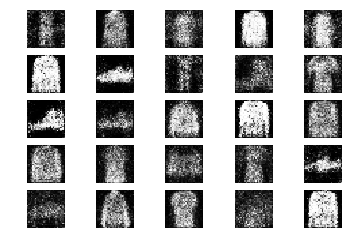

1351 [D loss: 0.617414, acc.: 67.19%] [G loss: 0.955443]
1352 [D loss: 0.561813, acc.: 71.88%] [G loss: 0.962589]
1353 [D loss: 0.589841, acc.: 67.19%] [G loss: 0.833045]
1354 [D loss: 0.573363, acc.: 70.31%] [G loss: 0.853797]
1355 [D loss: 0.703861, acc.: 54.69%] [G loss: 0.950900]
1356 [D loss: 0.653732, acc.: 62.50%] [G loss: 1.057753]
1357 [D loss: 0.542169, acc.: 71.88%] [G loss: 0.945986]
1358 [D loss: 0.689277, acc.: 48.44%] [G loss: 1.043223]
1359 [D loss: 0.608008, acc.: 60.94%] [G loss: 0.894198]
1360 [D loss: 0.634391, acc.: 59.38%] [G loss: 0.951330]
1361 [D loss: 0.628097, acc.: 65.62%] [G loss: 0.953488]
1362 [D loss: 0.672526, acc.: 64.06%] [G loss: 0.943798]
1363 [D loss: 0.582175, acc.: 65.62%] [G loss: 0.911401]
1364 [D loss: 0.603690, acc.: 65.62%] [G loss: 1.063119]
1365 [D loss: 0.556470, acc.: 78.12%] [G loss: 1.059201]
1366 [D loss: 0.665052, acc.: 60.94%] [G loss: 0.964334]
1367 [D loss: 0.580935, acc.: 73.44%] [G loss: 0.914311]
1368 [D loss: 0.610730, acc.: 6

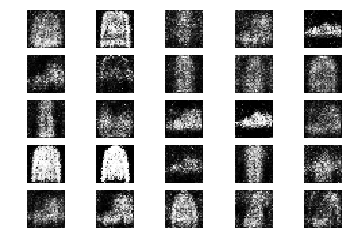

1401 [D loss: 0.613466, acc.: 67.19%] [G loss: 0.956547]
1402 [D loss: 0.655304, acc.: 59.38%] [G loss: 0.956269]
1403 [D loss: 0.641905, acc.: 60.94%] [G loss: 0.844942]
1404 [D loss: 0.640461, acc.: 68.75%] [G loss: 0.856951]
1405 [D loss: 0.641144, acc.: 62.50%] [G loss: 0.983955]
1406 [D loss: 0.526964, acc.: 76.56%] [G loss: 0.990730]
1407 [D loss: 0.604906, acc.: 67.19%] [G loss: 0.832815]
1408 [D loss: 0.587262, acc.: 71.88%] [G loss: 0.995186]
1409 [D loss: 0.653403, acc.: 59.38%] [G loss: 0.945771]
1410 [D loss: 0.624065, acc.: 65.62%] [G loss: 1.006100]
1411 [D loss: 0.685407, acc.: 54.69%] [G loss: 0.933894]
1412 [D loss: 0.572037, acc.: 70.31%] [G loss: 0.967883]
1413 [D loss: 0.577916, acc.: 76.56%] [G loss: 0.976737]
1414 [D loss: 0.654943, acc.: 62.50%] [G loss: 0.858618]
1415 [D loss: 0.615401, acc.: 64.06%] [G loss: 0.949554]
1416 [D loss: 0.650404, acc.: 60.94%] [G loss: 0.948544]
1417 [D loss: 0.612969, acc.: 68.75%] [G loss: 0.873942]
1418 [D loss: 0.583735, acc.: 7

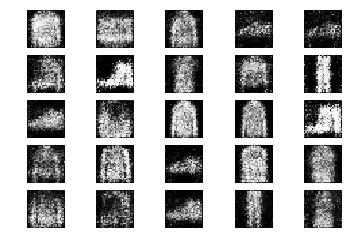

1451 [D loss: 0.605762, acc.: 65.62%] [G loss: 0.939585]
1452 [D loss: 0.551732, acc.: 76.56%] [G loss: 0.857538]
1453 [D loss: 0.641441, acc.: 65.62%] [G loss: 0.886147]
1454 [D loss: 0.573407, acc.: 67.19%] [G loss: 0.851668]
1455 [D loss: 0.590733, acc.: 71.88%] [G loss: 0.897204]
1456 [D loss: 0.648748, acc.: 54.69%] [G loss: 0.918178]
1457 [D loss: 0.549634, acc.: 76.56%] [G loss: 0.972100]
1458 [D loss: 0.602826, acc.: 64.06%] [G loss: 0.923918]
1459 [D loss: 0.591468, acc.: 64.06%] [G loss: 0.884492]
1460 [D loss: 0.655917, acc.: 57.81%] [G loss: 0.983601]
1461 [D loss: 0.661482, acc.: 60.94%] [G loss: 0.906988]
1462 [D loss: 0.595101, acc.: 64.06%] [G loss: 0.862513]
1463 [D loss: 0.644029, acc.: 62.50%] [G loss: 0.971533]
1464 [D loss: 0.663761, acc.: 54.69%] [G loss: 0.953001]
1465 [D loss: 0.571342, acc.: 70.31%] [G loss: 0.972594]
1466 [D loss: 0.673674, acc.: 56.25%] [G loss: 0.875445]
1467 [D loss: 0.599554, acc.: 62.50%] [G loss: 0.995615]
1468 [D loss: 0.638799, acc.: 5

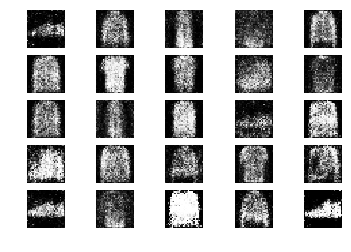

1501 [D loss: 0.609299, acc.: 70.31%] [G loss: 0.938994]
1502 [D loss: 0.627938, acc.: 65.62%] [G loss: 0.999951]
1503 [D loss: 0.543807, acc.: 82.81%] [G loss: 1.003702]
1504 [D loss: 0.557508, acc.: 75.00%] [G loss: 0.977144]
1505 [D loss: 0.674891, acc.: 57.81%] [G loss: 0.976258]
1506 [D loss: 0.567679, acc.: 71.88%] [G loss: 0.921418]
1507 [D loss: 0.685649, acc.: 60.94%] [G loss: 0.939155]
1508 [D loss: 0.596987, acc.: 68.75%] [G loss: 0.937445]
1509 [D loss: 0.589525, acc.: 65.62%] [G loss: 0.902444]
1510 [D loss: 0.567110, acc.: 76.56%] [G loss: 0.865983]
1511 [D loss: 0.584279, acc.: 70.31%] [G loss: 0.890208]
1512 [D loss: 0.628691, acc.: 68.75%] [G loss: 0.836212]
1513 [D loss: 0.616210, acc.: 70.31%] [G loss: 1.011176]
1514 [D loss: 0.630943, acc.: 65.62%] [G loss: 0.888519]
1515 [D loss: 0.666908, acc.: 64.06%] [G loss: 1.002445]
1516 [D loss: 0.678105, acc.: 54.69%] [G loss: 0.830077]
1517 [D loss: 0.605268, acc.: 67.19%] [G loss: 0.939160]
1518 [D loss: 0.591714, acc.: 6

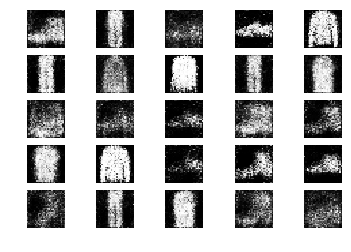

1551 [D loss: 0.619479, acc.: 76.56%] [G loss: 0.961125]
1552 [D loss: 0.559268, acc.: 71.88%] [G loss: 0.933943]
1553 [D loss: 0.578706, acc.: 67.19%] [G loss: 0.940254]
1554 [D loss: 0.612612, acc.: 65.62%] [G loss: 0.836424]
1555 [D loss: 0.637820, acc.: 65.62%] [G loss: 0.880420]
1556 [D loss: 0.635727, acc.: 62.50%] [G loss: 0.898316]
1557 [D loss: 0.617418, acc.: 64.06%] [G loss: 0.852600]
1558 [D loss: 0.582488, acc.: 67.19%] [G loss: 0.915228]
1559 [D loss: 0.665790, acc.: 62.50%] [G loss: 0.999725]
1560 [D loss: 0.601365, acc.: 65.62%] [G loss: 1.003703]
1561 [D loss: 0.505093, acc.: 81.25%] [G loss: 1.007369]
1562 [D loss: 0.546061, acc.: 71.88%] [G loss: 0.989174]
1563 [D loss: 0.628240, acc.: 65.62%] [G loss: 0.977971]
1564 [D loss: 0.535968, acc.: 70.31%] [G loss: 1.006280]
1565 [D loss: 0.568277, acc.: 71.88%] [G loss: 0.937331]
1566 [D loss: 0.618125, acc.: 67.19%] [G loss: 0.979733]
1567 [D loss: 0.603439, acc.: 67.19%] [G loss: 1.104162]
1568 [D loss: 0.576986, acc.: 7

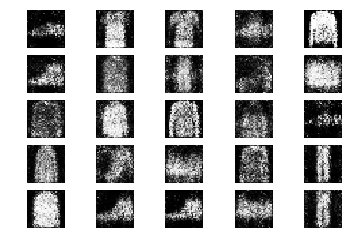

1601 [D loss: 0.613736, acc.: 65.62%] [G loss: 0.942379]
1602 [D loss: 0.621894, acc.: 60.94%] [G loss: 1.038811]
1603 [D loss: 0.631306, acc.: 62.50%] [G loss: 0.974541]
1604 [D loss: 0.652017, acc.: 56.25%] [G loss: 1.070321]
1605 [D loss: 0.635208, acc.: 62.50%] [G loss: 1.057980]
1606 [D loss: 0.616690, acc.: 65.62%] [G loss: 1.133029]
1607 [D loss: 0.569803, acc.: 71.88%] [G loss: 0.985223]
1608 [D loss: 0.619729, acc.: 67.19%] [G loss: 0.986447]
1609 [D loss: 0.601280, acc.: 71.88%] [G loss: 0.980832]
1610 [D loss: 0.611162, acc.: 64.06%] [G loss: 0.851367]
1611 [D loss: 0.551572, acc.: 75.00%] [G loss: 0.864761]
1612 [D loss: 0.591991, acc.: 73.44%] [G loss: 0.789751]
1613 [D loss: 0.618256, acc.: 62.50%] [G loss: 0.859013]
1614 [D loss: 0.562463, acc.: 75.00%] [G loss: 0.886461]
1615 [D loss: 0.635644, acc.: 59.38%] [G loss: 0.949399]
1616 [D loss: 0.567648, acc.: 75.00%] [G loss: 0.912767]
1617 [D loss: 0.643813, acc.: 62.50%] [G loss: 0.964893]
1618 [D loss: 0.604601, acc.: 6

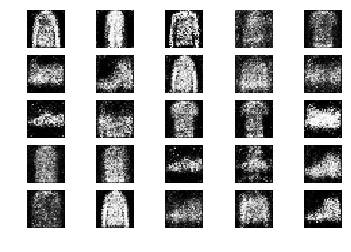

1651 [D loss: 0.575045, acc.: 73.44%] [G loss: 0.951899]
1652 [D loss: 0.696017, acc.: 60.94%] [G loss: 0.939475]
1653 [D loss: 0.653677, acc.: 59.38%] [G loss: 0.948800]
1654 [D loss: 0.563562, acc.: 78.12%] [G loss: 0.890437]
1655 [D loss: 0.602361, acc.: 62.50%] [G loss: 0.958936]
1656 [D loss: 0.639335, acc.: 62.50%] [G loss: 0.922030]
1657 [D loss: 0.654522, acc.: 64.06%] [G loss: 0.934572]
1658 [D loss: 0.546404, acc.: 79.69%] [G loss: 0.961220]
1659 [D loss: 0.651628, acc.: 57.81%] [G loss: 1.022871]
1660 [D loss: 0.585399, acc.: 64.06%] [G loss: 0.947793]
1661 [D loss: 0.612460, acc.: 70.31%] [G loss: 0.830730]
1662 [D loss: 0.585149, acc.: 71.88%] [G loss: 0.910111]
1663 [D loss: 0.586988, acc.: 68.75%] [G loss: 0.923340]
1664 [D loss: 0.605325, acc.: 65.62%] [G loss: 0.896299]
1665 [D loss: 0.608116, acc.: 70.31%] [G loss: 0.879177]
1666 [D loss: 0.596264, acc.: 65.62%] [G loss: 0.936070]
1667 [D loss: 0.651954, acc.: 53.12%] [G loss: 0.979617]
1668 [D loss: 0.535303, acc.: 7

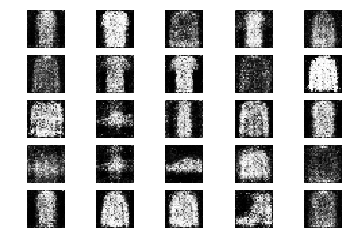

1701 [D loss: 0.584163, acc.: 68.75%] [G loss: 1.052927]
1702 [D loss: 0.585688, acc.: 70.31%] [G loss: 0.952488]
1703 [D loss: 0.569552, acc.: 71.88%] [G loss: 0.960811]
1704 [D loss: 0.536409, acc.: 75.00%] [G loss: 0.976368]
1705 [D loss: 0.605524, acc.: 67.19%] [G loss: 0.947795]
1706 [D loss: 0.579195, acc.: 76.56%] [G loss: 1.004786]
1707 [D loss: 0.621786, acc.: 64.06%] [G loss: 1.050298]
1708 [D loss: 0.562554, acc.: 82.81%] [G loss: 1.000080]
1709 [D loss: 0.639563, acc.: 62.50%] [G loss: 0.977028]
1710 [D loss: 0.635803, acc.: 59.38%] [G loss: 0.949012]
1711 [D loss: 0.605665, acc.: 65.62%] [G loss: 0.990016]
1712 [D loss: 0.591668, acc.: 71.88%] [G loss: 0.973812]
1713 [D loss: 0.582394, acc.: 73.44%] [G loss: 1.010371]
1714 [D loss: 0.590373, acc.: 64.06%] [G loss: 1.025222]
1715 [D loss: 0.564576, acc.: 68.75%] [G loss: 1.030711]
1716 [D loss: 0.601330, acc.: 71.88%] [G loss: 0.960673]
1717 [D loss: 0.531937, acc.: 79.69%] [G loss: 1.176617]
1718 [D loss: 0.654209, acc.: 5

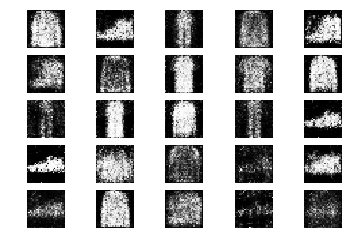

1751 [D loss: 0.542522, acc.: 73.44%] [G loss: 0.923286]
1752 [D loss: 0.560979, acc.: 75.00%] [G loss: 0.946274]
1753 [D loss: 0.615417, acc.: 60.94%] [G loss: 1.016512]
1754 [D loss: 0.676397, acc.: 57.81%] [G loss: 0.961767]
1755 [D loss: 0.610673, acc.: 59.38%] [G loss: 1.041959]
1756 [D loss: 0.634457, acc.: 65.62%] [G loss: 0.991678]
1757 [D loss: 0.640013, acc.: 64.06%] [G loss: 0.969903]
1758 [D loss: 0.664099, acc.: 57.81%] [G loss: 0.885444]
1759 [D loss: 0.616090, acc.: 68.75%] [G loss: 0.820490]
1760 [D loss: 0.567306, acc.: 67.19%] [G loss: 0.936260]
1761 [D loss: 0.592364, acc.: 70.31%] [G loss: 1.023885]
1762 [D loss: 0.590240, acc.: 67.19%] [G loss: 0.942593]
1763 [D loss: 0.630617, acc.: 70.31%] [G loss: 0.959002]
1764 [D loss: 0.561908, acc.: 71.88%] [G loss: 1.052737]
1765 [D loss: 0.638507, acc.: 62.50%] [G loss: 0.884037]
1766 [D loss: 0.560649, acc.: 64.06%] [G loss: 0.999113]
1767 [D loss: 0.525877, acc.: 67.19%] [G loss: 0.952829]
1768 [D loss: 0.582078, acc.: 7

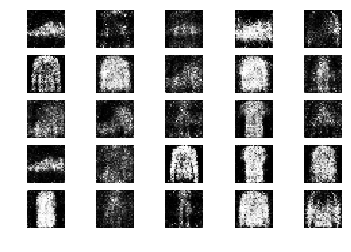

1801 [D loss: 0.583537, acc.: 68.75%] [G loss: 0.957975]
1802 [D loss: 0.648472, acc.: 62.50%] [G loss: 0.906759]
1803 [D loss: 0.603317, acc.: 64.06%] [G loss: 0.949819]
1804 [D loss: 0.590111, acc.: 62.50%] [G loss: 0.920048]
1805 [D loss: 0.602794, acc.: 75.00%] [G loss: 1.136602]
1806 [D loss: 0.656689, acc.: 64.06%] [G loss: 1.010823]
1807 [D loss: 0.673479, acc.: 59.38%] [G loss: 0.921498]
1808 [D loss: 0.689431, acc.: 54.69%] [G loss: 1.037007]
1809 [D loss: 0.576643, acc.: 64.06%] [G loss: 0.904518]
1810 [D loss: 0.576471, acc.: 75.00%] [G loss: 0.962178]
1811 [D loss: 0.558288, acc.: 78.12%] [G loss: 0.897587]
1812 [D loss: 0.600933, acc.: 70.31%] [G loss: 0.931392]
1813 [D loss: 0.578375, acc.: 75.00%] [G loss: 0.857877]
1814 [D loss: 0.602150, acc.: 64.06%] [G loss: 0.908910]
1815 [D loss: 0.555428, acc.: 78.12%] [G loss: 0.998671]
1816 [D loss: 0.661106, acc.: 65.62%] [G loss: 1.002555]
1817 [D loss: 0.627972, acc.: 59.38%] [G loss: 1.027547]
1818 [D loss: 0.604760, acc.: 6

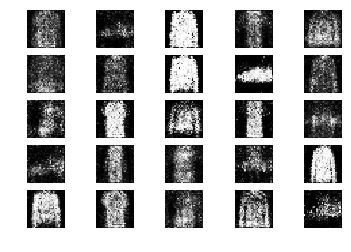

1851 [D loss: 0.511489, acc.: 75.00%] [G loss: 1.023474]
1852 [D loss: 0.587787, acc.: 68.75%] [G loss: 0.922643]
1853 [D loss: 0.616150, acc.: 62.50%] [G loss: 0.938871]
1854 [D loss: 0.617395, acc.: 62.50%] [G loss: 0.934027]
1855 [D loss: 0.574973, acc.: 75.00%] [G loss: 0.936100]
1856 [D loss: 0.631533, acc.: 68.75%] [G loss: 0.978181]
1857 [D loss: 0.549055, acc.: 67.19%] [G loss: 0.939830]
1858 [D loss: 0.556552, acc.: 73.44%] [G loss: 1.047271]
1859 [D loss: 0.559110, acc.: 67.19%] [G loss: 0.900461]
1860 [D loss: 0.557494, acc.: 76.56%] [G loss: 1.000620]
1861 [D loss: 0.627172, acc.: 62.50%] [G loss: 0.895692]
1862 [D loss: 0.650317, acc.: 67.19%] [G loss: 0.919976]
1863 [D loss: 0.632664, acc.: 60.94%] [G loss: 0.898968]
1864 [D loss: 0.631176, acc.: 71.88%] [G loss: 0.945211]
1865 [D loss: 0.577623, acc.: 71.88%] [G loss: 0.980536]
1866 [D loss: 0.588842, acc.: 70.31%] [G loss: 0.942542]
1867 [D loss: 0.630985, acc.: 60.94%] [G loss: 0.925197]
1868 [D loss: 0.606447, acc.: 7

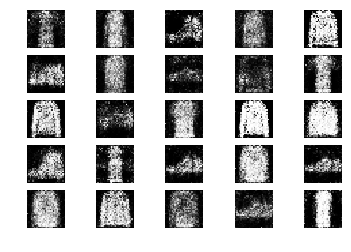

1901 [D loss: 0.559296, acc.: 76.56%] [G loss: 1.003730]
1902 [D loss: 0.628280, acc.: 62.50%] [G loss: 0.893592]
1903 [D loss: 0.665550, acc.: 65.62%] [G loss: 1.076400]
1904 [D loss: 0.643236, acc.: 73.44%] [G loss: 0.917573]
1905 [D loss: 0.547062, acc.: 68.75%] [G loss: 0.951161]
1906 [D loss: 0.560132, acc.: 71.88%] [G loss: 1.068295]
1907 [D loss: 0.696884, acc.: 54.69%] [G loss: 0.990831]
1908 [D loss: 0.617802, acc.: 64.06%] [G loss: 1.003669]
1909 [D loss: 0.646792, acc.: 60.94%] [G loss: 1.084227]
1910 [D loss: 0.641724, acc.: 65.62%] [G loss: 0.991516]
1911 [D loss: 0.588860, acc.: 68.75%] [G loss: 1.028817]
1912 [D loss: 0.655990, acc.: 62.50%] [G loss: 0.999023]
1913 [D loss: 0.666774, acc.: 56.25%] [G loss: 0.916583]
1914 [D loss: 0.544503, acc.: 73.44%] [G loss: 1.027362]
1915 [D loss: 0.665270, acc.: 64.06%] [G loss: 1.056397]
1916 [D loss: 0.662908, acc.: 56.25%] [G loss: 0.933040]
1917 [D loss: 0.603302, acc.: 67.19%] [G loss: 0.929301]
1918 [D loss: 0.594564, acc.: 6

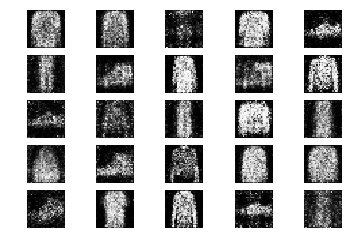

1951 [D loss: 0.657674, acc.: 57.81%] [G loss: 1.025773]
1952 [D loss: 0.555292, acc.: 67.19%] [G loss: 0.899577]
1953 [D loss: 0.614282, acc.: 60.94%] [G loss: 0.986749]
1954 [D loss: 0.587686, acc.: 67.19%] [G loss: 0.897109]
1955 [D loss: 0.545394, acc.: 79.69%] [G loss: 0.964266]
1956 [D loss: 0.585249, acc.: 71.88%] [G loss: 0.979233]
1957 [D loss: 0.626933, acc.: 59.38%] [G loss: 1.042205]
1958 [D loss: 0.536967, acc.: 70.31%] [G loss: 0.956977]
1959 [D loss: 0.555155, acc.: 78.12%] [G loss: 1.044489]
1960 [D loss: 0.579369, acc.: 71.88%] [G loss: 0.930391]
1961 [D loss: 0.586035, acc.: 65.62%] [G loss: 0.925512]
1962 [D loss: 0.597631, acc.: 68.75%] [G loss: 1.048768]
1963 [D loss: 0.539161, acc.: 76.56%] [G loss: 1.015713]
1964 [D loss: 0.663676, acc.: 60.94%] [G loss: 0.942330]
1965 [D loss: 0.604680, acc.: 70.31%] [G loss: 1.007975]
1966 [D loss: 0.538577, acc.: 73.44%] [G loss: 0.950028]
1967 [D loss: 0.587458, acc.: 68.75%] [G loss: 1.014816]
1968 [D loss: 0.604762, acc.: 7

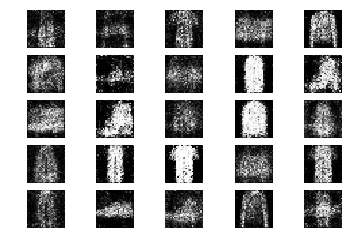

2001 [D loss: 0.586824, acc.: 68.75%] [G loss: 1.114710]
2002 [D loss: 0.620330, acc.: 65.62%] [G loss: 1.050895]
2003 [D loss: 0.642458, acc.: 67.19%] [G loss: 0.992171]
2004 [D loss: 0.535749, acc.: 78.12%] [G loss: 0.957937]
2005 [D loss: 0.548572, acc.: 70.31%] [G loss: 0.979609]
2006 [D loss: 0.600369, acc.: 71.88%] [G loss: 1.007128]
2007 [D loss: 0.629653, acc.: 60.94%] [G loss: 0.903890]
2008 [D loss: 0.688280, acc.: 56.25%] [G loss: 1.010017]
2009 [D loss: 0.573546, acc.: 70.31%] [G loss: 0.949083]
2010 [D loss: 0.620206, acc.: 68.75%] [G loss: 0.982356]
2011 [D loss: 0.700118, acc.: 60.94%] [G loss: 0.964035]
2012 [D loss: 0.600939, acc.: 67.19%] [G loss: 0.933066]
2013 [D loss: 0.578589, acc.: 64.06%] [G loss: 0.952859]
2014 [D loss: 0.600352, acc.: 68.75%] [G loss: 0.920344]
2015 [D loss: 0.578077, acc.: 65.62%] [G loss: 0.929689]
2016 [D loss: 0.580622, acc.: 71.88%] [G loss: 0.985850]
2017 [D loss: 0.614846, acc.: 65.62%] [G loss: 1.032378]
2018 [D loss: 0.587179, acc.: 7

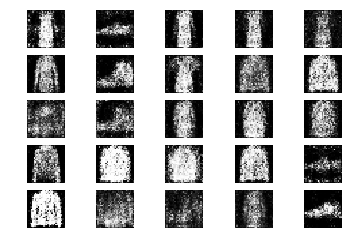

2051 [D loss: 0.579780, acc.: 76.56%] [G loss: 0.929178]
2052 [D loss: 0.620568, acc.: 71.88%] [G loss: 1.003056]
2053 [D loss: 0.583093, acc.: 68.75%] [G loss: 1.002548]
2054 [D loss: 0.555961, acc.: 71.88%] [G loss: 0.969590]
2055 [D loss: 0.511788, acc.: 81.25%] [G loss: 0.943710]
2056 [D loss: 0.509969, acc.: 79.69%] [G loss: 1.034742]
2057 [D loss: 0.605056, acc.: 65.62%] [G loss: 1.014158]
2058 [D loss: 0.550764, acc.: 73.44%] [G loss: 1.038765]
2059 [D loss: 0.676349, acc.: 64.06%] [G loss: 0.998866]
2060 [D loss: 0.701354, acc.: 54.69%] [G loss: 0.994518]
2061 [D loss: 0.584205, acc.: 70.31%] [G loss: 0.932715]
2062 [D loss: 0.634021, acc.: 67.19%] [G loss: 0.963504]
2063 [D loss: 0.540212, acc.: 68.75%] [G loss: 0.990741]
2064 [D loss: 0.689337, acc.: 57.81%] [G loss: 0.918280]
2065 [D loss: 0.598120, acc.: 65.62%] [G loss: 0.932992]
2066 [D loss: 0.626841, acc.: 54.69%] [G loss: 1.009192]
2067 [D loss: 0.578290, acc.: 68.75%] [G loss: 0.936558]
2068 [D loss: 0.620172, acc.: 6

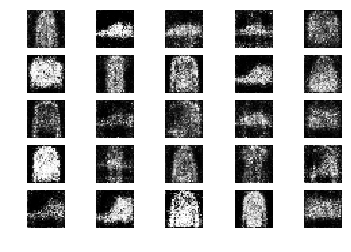

2101 [D loss: 0.607046, acc.: 70.31%] [G loss: 0.914074]
2102 [D loss: 0.623744, acc.: 64.06%] [G loss: 0.934279]
2103 [D loss: 0.566411, acc.: 70.31%] [G loss: 0.886016]
2104 [D loss: 0.606755, acc.: 71.88%] [G loss: 0.913120]
2105 [D loss: 0.624220, acc.: 64.06%] [G loss: 0.950512]
2106 [D loss: 0.625230, acc.: 64.06%] [G loss: 0.979809]
2107 [D loss: 0.591783, acc.: 75.00%] [G loss: 0.950930]
2108 [D loss: 0.661913, acc.: 60.94%] [G loss: 0.894144]
2109 [D loss: 0.587114, acc.: 71.88%] [G loss: 0.937033]
2110 [D loss: 0.576609, acc.: 79.69%] [G loss: 1.062228]
2111 [D loss: 0.563313, acc.: 71.88%] [G loss: 1.065219]
2112 [D loss: 0.630718, acc.: 70.31%] [G loss: 0.939347]
2113 [D loss: 0.582629, acc.: 73.44%] [G loss: 1.017447]
2114 [D loss: 0.630962, acc.: 71.88%] [G loss: 0.991953]
2115 [D loss: 0.568467, acc.: 73.44%] [G loss: 1.035354]
2116 [D loss: 0.605699, acc.: 71.88%] [G loss: 0.943020]
2117 [D loss: 0.639249, acc.: 65.62%] [G loss: 0.881504]
2118 [D loss: 0.613036, acc.: 7

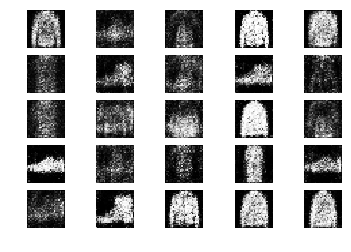

2151 [D loss: 0.586554, acc.: 70.31%] [G loss: 0.975459]
2152 [D loss: 0.546037, acc.: 73.44%] [G loss: 1.025373]
2153 [D loss: 0.644961, acc.: 64.06%] [G loss: 1.078876]
2154 [D loss: 0.739462, acc.: 56.25%] [G loss: 1.042536]
2155 [D loss: 0.637906, acc.: 60.94%] [G loss: 0.982444]
2156 [D loss: 0.576532, acc.: 73.44%] [G loss: 0.996124]
2157 [D loss: 0.603744, acc.: 68.75%] [G loss: 0.947851]
2158 [D loss: 0.545738, acc.: 75.00%] [G loss: 1.001649]
2159 [D loss: 0.626847, acc.: 64.06%] [G loss: 0.917332]
2160 [D loss: 0.564498, acc.: 71.88%] [G loss: 1.081751]
2161 [D loss: 0.635296, acc.: 65.62%] [G loss: 0.948781]
2162 [D loss: 0.564403, acc.: 71.88%] [G loss: 0.998714]
2163 [D loss: 0.581449, acc.: 68.75%] [G loss: 0.898719]
2164 [D loss: 0.584879, acc.: 70.31%] [G loss: 0.901854]
2165 [D loss: 0.613927, acc.: 64.06%] [G loss: 0.872538]
2166 [D loss: 0.635248, acc.: 65.62%] [G loss: 0.962301]
2167 [D loss: 0.596947, acc.: 70.31%] [G loss: 0.955050]
2168 [D loss: 0.658414, acc.: 5

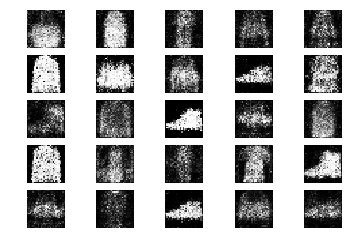

2201 [D loss: 0.548280, acc.: 68.75%] [G loss: 1.012950]
2202 [D loss: 0.574366, acc.: 71.88%] [G loss: 1.056002]
2203 [D loss: 0.618479, acc.: 68.75%] [G loss: 0.917552]
2204 [D loss: 0.571657, acc.: 70.31%] [G loss: 1.019361]
2205 [D loss: 0.634509, acc.: 62.50%] [G loss: 0.881066]
2206 [D loss: 0.540846, acc.: 68.75%] [G loss: 0.975083]
2207 [D loss: 0.601392, acc.: 67.19%] [G loss: 0.916553]
2208 [D loss: 0.623598, acc.: 68.75%] [G loss: 1.058591]
2209 [D loss: 0.614123, acc.: 67.19%] [G loss: 0.999933]
2210 [D loss: 0.630942, acc.: 60.94%] [G loss: 0.929445]
2211 [D loss: 0.536856, acc.: 75.00%] [G loss: 0.972459]
2212 [D loss: 0.593373, acc.: 70.31%] [G loss: 0.979813]
2213 [D loss: 0.695408, acc.: 64.06%] [G loss: 1.012584]
2214 [D loss: 0.591065, acc.: 64.06%] [G loss: 0.958445]
2215 [D loss: 0.581901, acc.: 70.31%] [G loss: 1.078579]
2216 [D loss: 0.622993, acc.: 60.94%] [G loss: 1.057750]
2217 [D loss: 0.645621, acc.: 59.38%] [G loss: 1.075636]
2218 [D loss: 0.586353, acc.: 6

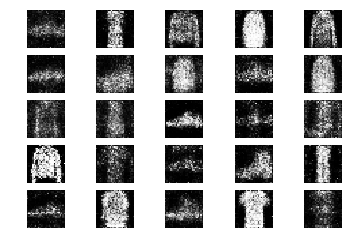

2251 [D loss: 0.605406, acc.: 64.06%] [G loss: 1.038695]
2252 [D loss: 0.660508, acc.: 60.94%] [G loss: 1.042547]
2253 [D loss: 0.584564, acc.: 64.06%] [G loss: 0.997819]
2254 [D loss: 0.675879, acc.: 57.81%] [G loss: 0.999247]
2255 [D loss: 0.633902, acc.: 60.94%] [G loss: 1.029608]
2256 [D loss: 0.485334, acc.: 81.25%] [G loss: 0.931902]
2257 [D loss: 0.661494, acc.: 51.56%] [G loss: 0.927160]
2258 [D loss: 0.599177, acc.: 65.62%] [G loss: 0.873732]
2259 [D loss: 0.566062, acc.: 65.62%] [G loss: 0.916216]
2260 [D loss: 0.647310, acc.: 59.38%] [G loss: 0.892051]
2261 [D loss: 0.668660, acc.: 57.81%] [G loss: 0.984386]
2262 [D loss: 0.591401, acc.: 65.62%] [G loss: 0.998549]
2263 [D loss: 0.608666, acc.: 68.75%] [G loss: 0.937436]
2264 [D loss: 0.574881, acc.: 65.62%] [G loss: 1.002564]
2265 [D loss: 0.544150, acc.: 71.88%] [G loss: 1.083649]
2266 [D loss: 0.633392, acc.: 62.50%] [G loss: 0.941918]
2267 [D loss: 0.566500, acc.: 67.19%] [G loss: 0.903898]
2268 [D loss: 0.621022, acc.: 6

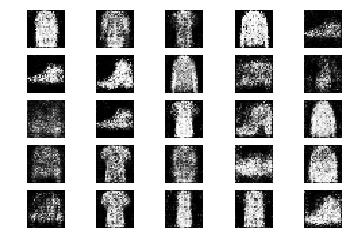

2301 [D loss: 0.562720, acc.: 70.31%] [G loss: 1.024074]
2302 [D loss: 0.636434, acc.: 65.62%] [G loss: 0.894578]
2303 [D loss: 0.562017, acc.: 67.19%] [G loss: 0.933892]
2304 [D loss: 0.643441, acc.: 60.94%] [G loss: 0.951842]
2305 [D loss: 0.630372, acc.: 71.88%] [G loss: 1.005644]
2306 [D loss: 0.655583, acc.: 62.50%] [G loss: 0.961643]
2307 [D loss: 0.562027, acc.: 71.88%] [G loss: 0.996668]
2308 [D loss: 0.587494, acc.: 70.31%] [G loss: 1.009909]
2309 [D loss: 0.567429, acc.: 68.75%] [G loss: 1.020115]
2310 [D loss: 0.642483, acc.: 59.38%] [G loss: 0.992943]
2311 [D loss: 0.654154, acc.: 59.38%] [G loss: 0.928344]
2312 [D loss: 0.602473, acc.: 64.06%] [G loss: 0.949540]
2313 [D loss: 0.574490, acc.: 76.56%] [G loss: 0.995385]
2314 [D loss: 0.582274, acc.: 60.94%] [G loss: 1.001437]
2315 [D loss: 0.564505, acc.: 68.75%] [G loss: 1.051630]
2316 [D loss: 0.558236, acc.: 81.25%] [G loss: 0.947405]
2317 [D loss: 0.609116, acc.: 68.75%] [G loss: 0.973467]
2318 [D loss: 0.596278, acc.: 6

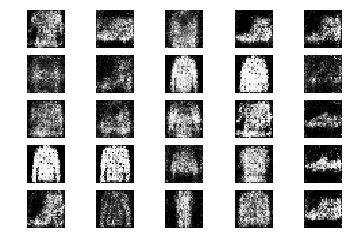

2351 [D loss: 0.574892, acc.: 68.75%] [G loss: 0.954195]
2352 [D loss: 0.667406, acc.: 67.19%] [G loss: 1.035288]
2353 [D loss: 0.636842, acc.: 64.06%] [G loss: 1.033065]
2354 [D loss: 0.596796, acc.: 71.88%] [G loss: 0.982987]
2355 [D loss: 0.599409, acc.: 68.75%] [G loss: 1.087398]
2356 [D loss: 0.542452, acc.: 68.75%] [G loss: 1.017209]
2357 [D loss: 0.622661, acc.: 62.50%] [G loss: 1.014272]
2358 [D loss: 0.646186, acc.: 62.50%] [G loss: 1.063817]
2359 [D loss: 0.524350, acc.: 76.56%] [G loss: 1.054208]
2360 [D loss: 0.629944, acc.: 59.38%] [G loss: 0.964662]
2361 [D loss: 0.577233, acc.: 68.75%] [G loss: 0.980142]
2362 [D loss: 0.614869, acc.: 71.88%] [G loss: 1.107536]
2363 [D loss: 0.555660, acc.: 71.88%] [G loss: 1.006617]
2364 [D loss: 0.619335, acc.: 71.88%] [G loss: 0.941657]
2365 [D loss: 0.566059, acc.: 75.00%] [G loss: 0.993978]
2366 [D loss: 0.579896, acc.: 75.00%] [G loss: 1.060256]
2367 [D loss: 0.565031, acc.: 70.31%] [G loss: 0.984794]
2368 [D loss: 0.547215, acc.: 7

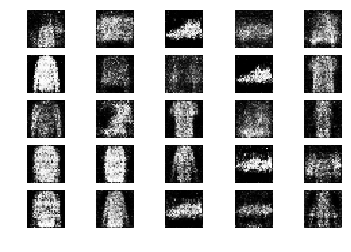

2401 [D loss: 0.612787, acc.: 62.50%] [G loss: 0.931064]
2402 [D loss: 0.627557, acc.: 65.62%] [G loss: 0.921219]
2403 [D loss: 0.625799, acc.: 62.50%] [G loss: 0.943028]
2404 [D loss: 0.638710, acc.: 53.12%] [G loss: 0.911499]
2405 [D loss: 0.558899, acc.: 70.31%] [G loss: 0.905657]
2406 [D loss: 0.581202, acc.: 68.75%] [G loss: 0.893166]
2407 [D loss: 0.709693, acc.: 56.25%] [G loss: 0.965335]
2408 [D loss: 0.680370, acc.: 57.81%] [G loss: 1.161600]
2409 [D loss: 0.666751, acc.: 59.38%] [G loss: 0.969077]
2410 [D loss: 0.668174, acc.: 54.69%] [G loss: 1.016127]
2411 [D loss: 0.521480, acc.: 70.31%] [G loss: 0.980600]
2412 [D loss: 0.618273, acc.: 62.50%] [G loss: 1.092566]
2413 [D loss: 0.514257, acc.: 76.56%] [G loss: 0.928191]
2414 [D loss: 0.576511, acc.: 70.31%] [G loss: 0.957288]
2415 [D loss: 0.553210, acc.: 70.31%] [G loss: 0.879274]
2416 [D loss: 0.593152, acc.: 60.94%] [G loss: 0.897814]
2417 [D loss: 0.586386, acc.: 68.75%] [G loss: 0.893332]
2418 [D loss: 0.648366, acc.: 5

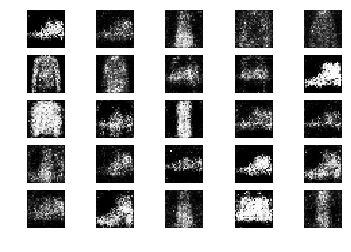

2451 [D loss: 0.630461, acc.: 64.06%] [G loss: 1.044443]
2452 [D loss: 0.628275, acc.: 67.19%] [G loss: 0.966594]
2453 [D loss: 0.583417, acc.: 67.19%] [G loss: 0.985589]
2454 [D loss: 0.612352, acc.: 67.19%] [G loss: 0.897244]
2455 [D loss: 0.639741, acc.: 65.62%] [G loss: 0.909734]
2456 [D loss: 0.636359, acc.: 68.75%] [G loss: 0.920386]
2457 [D loss: 0.668154, acc.: 54.69%] [G loss: 0.941532]
2458 [D loss: 0.575688, acc.: 67.19%] [G loss: 1.048806]
2459 [D loss: 0.658350, acc.: 59.38%] [G loss: 0.936876]
2460 [D loss: 0.539368, acc.: 75.00%] [G loss: 0.935874]
2461 [D loss: 0.631259, acc.: 56.25%] [G loss: 1.062932]
2462 [D loss: 0.600182, acc.: 75.00%] [G loss: 0.949599]
2463 [D loss: 0.526874, acc.: 78.12%] [G loss: 0.988070]
2464 [D loss: 0.600005, acc.: 68.75%] [G loss: 1.016079]
2465 [D loss: 0.603293, acc.: 67.19%] [G loss: 0.940303]
2466 [D loss: 0.644815, acc.: 60.94%] [G loss: 0.993607]
2467 [D loss: 0.573816, acc.: 70.31%] [G loss: 0.991247]
2468 [D loss: 0.579143, acc.: 6

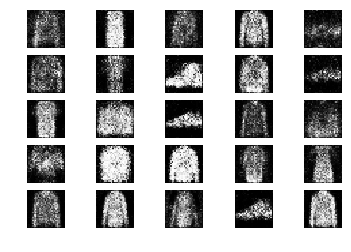

2501 [D loss: 0.544174, acc.: 70.31%] [G loss: 1.037767]
2502 [D loss: 0.569255, acc.: 68.75%] [G loss: 1.043592]
2503 [D loss: 0.595640, acc.: 70.31%] [G loss: 0.981864]
2504 [D loss: 0.633456, acc.: 65.62%] [G loss: 0.933946]
2505 [D loss: 0.572921, acc.: 68.75%] [G loss: 0.872250]
2506 [D loss: 0.613749, acc.: 67.19%] [G loss: 1.025371]
2507 [D loss: 0.577610, acc.: 65.62%] [G loss: 1.036952]
2508 [D loss: 0.606923, acc.: 57.81%] [G loss: 1.061099]
2509 [D loss: 0.581846, acc.: 67.19%] [G loss: 1.030193]
2510 [D loss: 0.681879, acc.: 62.50%] [G loss: 0.969146]
2511 [D loss: 0.555385, acc.: 71.88%] [G loss: 1.039460]
2512 [D loss: 0.562470, acc.: 68.75%] [G loss: 1.039589]
2513 [D loss: 0.606514, acc.: 60.94%] [G loss: 0.963318]
2514 [D loss: 0.627549, acc.: 56.25%] [G loss: 0.904525]
2515 [D loss: 0.596473, acc.: 65.62%] [G loss: 0.956259]
2516 [D loss: 0.632916, acc.: 65.62%] [G loss: 0.974949]
2517 [D loss: 0.631803, acc.: 56.25%] [G loss: 0.968328]
2518 [D loss: 0.564530, acc.: 6

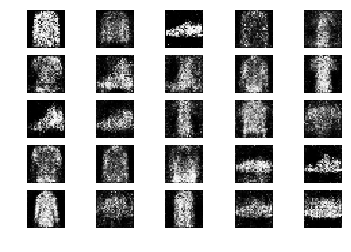

2551 [D loss: 0.520519, acc.: 79.69%] [G loss: 0.890184]
2552 [D loss: 0.558430, acc.: 78.12%] [G loss: 0.925558]
2553 [D loss: 0.639665, acc.: 71.88%] [G loss: 1.017659]
2554 [D loss: 0.624862, acc.: 64.06%] [G loss: 0.956044]
2555 [D loss: 0.587026, acc.: 70.31%] [G loss: 1.032413]
2556 [D loss: 0.580072, acc.: 68.75%] [G loss: 1.032401]
2557 [D loss: 0.579239, acc.: 71.88%] [G loss: 1.043418]
2558 [D loss: 0.573680, acc.: 75.00%] [G loss: 1.005965]
2559 [D loss: 0.711107, acc.: 54.69%] [G loss: 0.924784]
2560 [D loss: 0.595098, acc.: 65.62%] [G loss: 0.814996]
2561 [D loss: 0.620993, acc.: 67.19%] [G loss: 0.943538]
2562 [D loss: 0.635836, acc.: 60.94%] [G loss: 0.909339]
2563 [D loss: 0.614271, acc.: 60.94%] [G loss: 0.896077]
2564 [D loss: 0.574923, acc.: 73.44%] [G loss: 0.979467]
2565 [D loss: 0.664391, acc.: 54.69%] [G loss: 1.011080]
2566 [D loss: 0.570801, acc.: 81.25%] [G loss: 0.894600]
2567 [D loss: 0.584546, acc.: 73.44%] [G loss: 0.954904]
2568 [D loss: 0.521356, acc.: 7

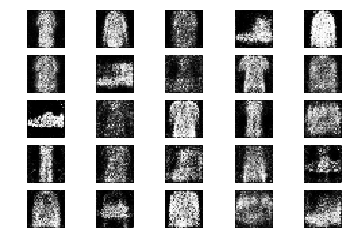

2601 [D loss: 0.608890, acc.: 65.62%] [G loss: 1.019452]
2602 [D loss: 0.563332, acc.: 71.88%] [G loss: 0.977608]
2603 [D loss: 0.595126, acc.: 65.62%] [G loss: 1.014386]
2604 [D loss: 0.579416, acc.: 70.31%] [G loss: 0.992366]
2605 [D loss: 0.638355, acc.: 64.06%] [G loss: 0.914051]
2606 [D loss: 0.645029, acc.: 57.81%] [G loss: 0.880796]
2607 [D loss: 0.598712, acc.: 70.31%] [G loss: 0.997723]
2608 [D loss: 0.695444, acc.: 57.81%] [G loss: 0.882950]
2609 [D loss: 0.586928, acc.: 71.88%] [G loss: 1.077336]
2610 [D loss: 0.552787, acc.: 68.75%] [G loss: 1.108101]
2611 [D loss: 0.622020, acc.: 65.62%] [G loss: 1.050005]
2612 [D loss: 0.617239, acc.: 64.06%] [G loss: 1.005221]
2613 [D loss: 0.617252, acc.: 64.06%] [G loss: 0.908173]
2614 [D loss: 0.664682, acc.: 57.81%] [G loss: 0.920467]
2615 [D loss: 0.658078, acc.: 65.62%] [G loss: 1.045310]
2616 [D loss: 0.578104, acc.: 71.88%] [G loss: 1.046187]
2617 [D loss: 0.539674, acc.: 70.31%] [G loss: 1.084031]
2618 [D loss: 0.660455, acc.: 6

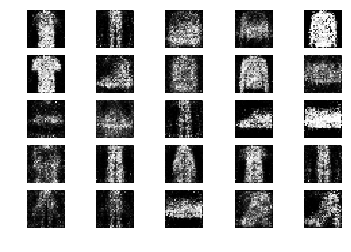

2651 [D loss: 0.656595, acc.: 59.38%] [G loss: 0.894209]
2652 [D loss: 0.567018, acc.: 73.44%] [G loss: 0.871957]
2653 [D loss: 0.628999, acc.: 64.06%] [G loss: 0.944793]
2654 [D loss: 0.576077, acc.: 68.75%] [G loss: 0.842380]
2655 [D loss: 0.623875, acc.: 59.38%] [G loss: 0.795207]
2656 [D loss: 0.603032, acc.: 71.88%] [G loss: 0.982205]
2657 [D loss: 0.625520, acc.: 65.62%] [G loss: 0.994775]
2658 [D loss: 0.619946, acc.: 71.88%] [G loss: 0.975034]
2659 [D loss: 0.644195, acc.: 56.25%] [G loss: 0.991715]
2660 [D loss: 0.546517, acc.: 76.56%] [G loss: 1.011186]
2661 [D loss: 0.585821, acc.: 68.75%] [G loss: 1.061775]
2662 [D loss: 0.627085, acc.: 57.81%] [G loss: 1.002827]
2663 [D loss: 0.636661, acc.: 65.62%] [G loss: 1.026294]
2664 [D loss: 0.602289, acc.: 71.88%] [G loss: 1.023720]
2665 [D loss: 0.681547, acc.: 65.62%] [G loss: 1.004589]
2666 [D loss: 0.564839, acc.: 73.44%] [G loss: 0.988722]
2667 [D loss: 0.614424, acc.: 70.31%] [G loss: 0.986028]
2668 [D loss: 0.573231, acc.: 6

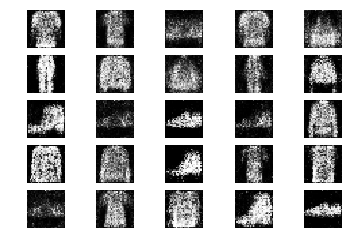

2701 [D loss: 0.631991, acc.: 59.38%] [G loss: 0.978664]
2702 [D loss: 0.645076, acc.: 57.81%] [G loss: 0.995068]
2703 [D loss: 0.583584, acc.: 70.31%] [G loss: 0.912977]
2704 [D loss: 0.610264, acc.: 60.94%] [G loss: 0.951359]
2705 [D loss: 0.564127, acc.: 78.12%] [G loss: 0.953436]
2706 [D loss: 0.604976, acc.: 68.75%] [G loss: 1.033956]
2707 [D loss: 0.679641, acc.: 62.50%] [G loss: 0.981801]
2708 [D loss: 0.563550, acc.: 71.88%] [G loss: 1.144065]
2709 [D loss: 0.594613, acc.: 65.62%] [G loss: 0.951818]
2710 [D loss: 0.674195, acc.: 56.25%] [G loss: 0.926123]
2711 [D loss: 0.571905, acc.: 68.75%] [G loss: 0.962780]
2712 [D loss: 0.697333, acc.: 60.94%] [G loss: 1.039559]
2713 [D loss: 0.578752, acc.: 67.19%] [G loss: 1.114134]
2714 [D loss: 0.609305, acc.: 65.62%] [G loss: 1.047112]
2715 [D loss: 0.563136, acc.: 76.56%] [G loss: 0.976140]
2716 [D loss: 0.654366, acc.: 60.94%] [G loss: 0.975542]
2717 [D loss: 0.604961, acc.: 73.44%] [G loss: 0.933251]
2718 [D loss: 0.623841, acc.: 6

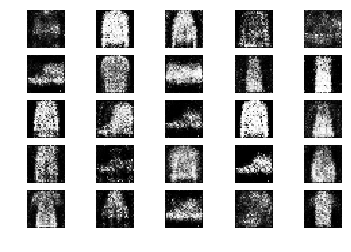

2751 [D loss: 0.621494, acc.: 59.38%] [G loss: 0.977275]
2752 [D loss: 0.632958, acc.: 71.88%] [G loss: 0.967573]
2753 [D loss: 0.594083, acc.: 67.19%] [G loss: 1.050045]
2754 [D loss: 0.626270, acc.: 64.06%] [G loss: 0.954355]
2755 [D loss: 0.593066, acc.: 68.75%] [G loss: 0.960270]
2756 [D loss: 0.571319, acc.: 70.31%] [G loss: 1.027041]
2757 [D loss: 0.652489, acc.: 54.69%] [G loss: 1.032931]
2758 [D loss: 0.673017, acc.: 62.50%] [G loss: 0.952034]
2759 [D loss: 0.583192, acc.: 65.62%] [G loss: 1.013806]
2760 [D loss: 0.558951, acc.: 73.44%] [G loss: 1.079510]
2761 [D loss: 0.627445, acc.: 65.62%] [G loss: 1.084622]
2762 [D loss: 0.640461, acc.: 60.94%] [G loss: 0.983433]
2763 [D loss: 0.655177, acc.: 59.38%] [G loss: 0.878940]
2764 [D loss: 0.626299, acc.: 65.62%] [G loss: 1.098684]
2765 [D loss: 0.620056, acc.: 67.19%] [G loss: 1.077233]
2766 [D loss: 0.650528, acc.: 60.94%] [G loss: 0.948405]
2767 [D loss: 0.660435, acc.: 56.25%] [G loss: 1.029175]
2768 [D loss: 0.674460, acc.: 5

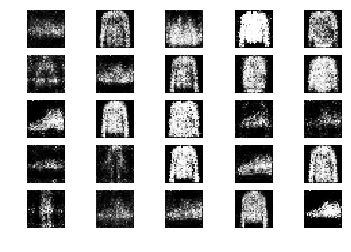

2801 [D loss: 0.618531, acc.: 57.81%] [G loss: 0.970093]
2802 [D loss: 0.658745, acc.: 64.06%] [G loss: 0.998578]
2803 [D loss: 0.634012, acc.: 62.50%] [G loss: 1.062215]
2804 [D loss: 0.568520, acc.: 71.88%] [G loss: 0.951343]
2805 [D loss: 0.546942, acc.: 76.56%] [G loss: 0.986043]
2806 [D loss: 0.651011, acc.: 62.50%] [G loss: 0.895893]
2807 [D loss: 0.563235, acc.: 68.75%] [G loss: 0.976171]
2808 [D loss: 0.706566, acc.: 48.44%] [G loss: 0.924900]
2809 [D loss: 0.608597, acc.: 62.50%] [G loss: 0.951330]
2810 [D loss: 0.654962, acc.: 62.50%] [G loss: 1.039064]
2811 [D loss: 0.630387, acc.: 70.31%] [G loss: 1.041422]
2812 [D loss: 0.634134, acc.: 57.81%] [G loss: 0.969252]
2813 [D loss: 0.652963, acc.: 62.50%] [G loss: 0.942007]
2814 [D loss: 0.603967, acc.: 67.19%] [G loss: 1.015123]
2815 [D loss: 0.566421, acc.: 70.31%] [G loss: 1.052534]
2816 [D loss: 0.618487, acc.: 60.94%] [G loss: 1.035674]
2817 [D loss: 0.653982, acc.: 53.12%] [G loss: 1.014130]
2818 [D loss: 0.556280, acc.: 7

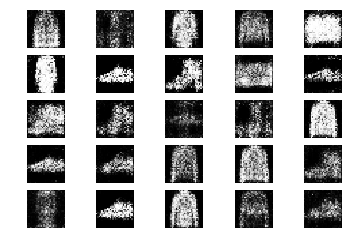

2851 [D loss: 0.568157, acc.: 71.88%] [G loss: 0.997688]
2852 [D loss: 0.570820, acc.: 71.88%] [G loss: 0.972169]
2853 [D loss: 0.577993, acc.: 71.88%] [G loss: 1.094482]
2854 [D loss: 0.774023, acc.: 48.44%] [G loss: 0.988876]
2855 [D loss: 0.572820, acc.: 70.31%] [G loss: 1.008494]
2856 [D loss: 0.594424, acc.: 67.19%] [G loss: 0.967208]
2857 [D loss: 0.620129, acc.: 68.75%] [G loss: 1.026102]
2858 [D loss: 0.581224, acc.: 70.31%] [G loss: 1.102523]
2859 [D loss: 0.597117, acc.: 70.31%] [G loss: 0.982110]
2860 [D loss: 0.645945, acc.: 60.94%] [G loss: 0.892459]
2861 [D loss: 0.588332, acc.: 64.06%] [G loss: 0.912905]
2862 [D loss: 0.608207, acc.: 71.88%] [G loss: 0.989695]
2863 [D loss: 0.528405, acc.: 71.88%] [G loss: 1.146576]
2864 [D loss: 0.499813, acc.: 71.88%] [G loss: 0.988487]
2865 [D loss: 0.639040, acc.: 57.81%] [G loss: 1.054537]
2866 [D loss: 0.501418, acc.: 78.12%] [G loss: 1.199352]
2867 [D loss: 0.591052, acc.: 64.06%] [G loss: 1.113078]
2868 [D loss: 0.685384, acc.: 5

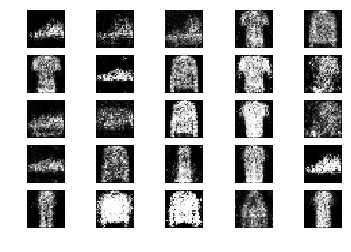

2901 [D loss: 0.625453, acc.: 62.50%] [G loss: 1.020903]
2902 [D loss: 0.564552, acc.: 71.88%] [G loss: 1.104089]
2903 [D loss: 0.560284, acc.: 84.38%] [G loss: 1.038346]
2904 [D loss: 0.624987, acc.: 60.94%] [G loss: 0.975712]
2905 [D loss: 0.613225, acc.: 65.62%] [G loss: 1.001118]
2906 [D loss: 0.536309, acc.: 79.69%] [G loss: 0.939788]
2907 [D loss: 0.600271, acc.: 62.50%] [G loss: 0.955612]
2908 [D loss: 0.626524, acc.: 70.31%] [G loss: 0.980915]
2909 [D loss: 0.642212, acc.: 64.06%] [G loss: 1.028117]
2910 [D loss: 0.583148, acc.: 60.94%] [G loss: 1.121814]
2911 [D loss: 0.664878, acc.: 65.62%] [G loss: 1.002596]
2912 [D loss: 0.630387, acc.: 57.81%] [G loss: 0.971942]
2913 [D loss: 0.625202, acc.: 67.19%] [G loss: 0.960198]
2914 [D loss: 0.650021, acc.: 59.38%] [G loss: 0.927352]
2915 [D loss: 0.662421, acc.: 51.56%] [G loss: 0.887640]
2916 [D loss: 0.554775, acc.: 64.06%] [G loss: 0.965811]
2917 [D loss: 0.665998, acc.: 62.50%] [G loss: 0.983537]
2918 [D loss: 0.621450, acc.: 6

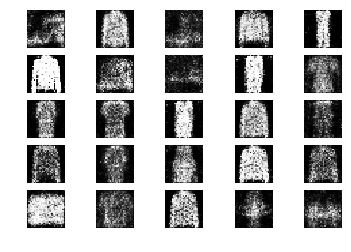

2951 [D loss: 0.600189, acc.: 60.94%] [G loss: 1.056739]
2952 [D loss: 0.608549, acc.: 64.06%] [G loss: 0.923113]
2953 [D loss: 0.651239, acc.: 64.06%] [G loss: 0.838796]
2954 [D loss: 0.567367, acc.: 75.00%] [G loss: 0.907895]
2955 [D loss: 0.585628, acc.: 62.50%] [G loss: 0.955506]
2956 [D loss: 0.639153, acc.: 64.06%] [G loss: 1.011046]
2957 [D loss: 0.649004, acc.: 59.38%] [G loss: 0.987301]
2958 [D loss: 0.584265, acc.: 64.06%] [G loss: 1.080387]
2959 [D loss: 0.588492, acc.: 70.31%] [G loss: 1.042698]
2960 [D loss: 0.670377, acc.: 54.69%] [G loss: 1.148656]
2961 [D loss: 0.629058, acc.: 62.50%] [G loss: 0.998227]
2962 [D loss: 0.615192, acc.: 68.75%] [G loss: 0.954719]
2963 [D loss: 0.549899, acc.: 70.31%] [G loss: 0.906342]
2964 [D loss: 0.607760, acc.: 62.50%] [G loss: 1.015594]
2965 [D loss: 0.564100, acc.: 75.00%] [G loss: 1.023894]
2966 [D loss: 0.630289, acc.: 65.62%] [G loss: 1.091048]
2967 [D loss: 0.586157, acc.: 68.75%] [G loss: 1.050979]
2968 [D loss: 0.607536, acc.: 6

In [45]:
epochs = 3000

batch_size = 32
valid = np.ones((batch_size, 1))
fake = np.zeros((batch_size, 1))

for epoch in range(epochs):
  # Train discriminator
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  imgs = x_train[idx]

  noise = np.random.normal(0, 1, (batch_size, 100))

  gen_imgs = generator.predict(noise)

  d_loss_real = discriminator.train_on_batch(imgs, valid)
  d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
  d_loss = 0.5*np.add(d_loss_real, d_loss_fake)

  # Train generator
  noise = np.random.normal(0, 1, (batch_size, 100))

  g_loss = combined.train_on_batch(noise, valid)

  print("%d [D loss: %f, acc.: %.2f%%] [G loss: %f]" % (epoch, d_loss[0], 100*d_loss[1], g_loss))

  if epoch % 50 == 0:
    sample_images(epoch)

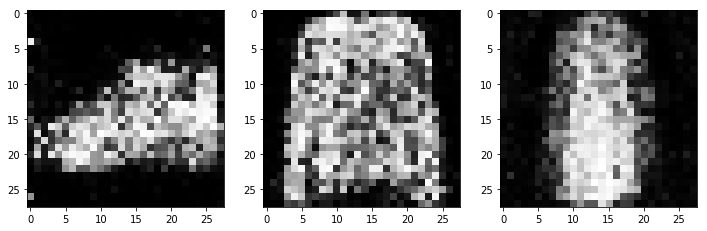

In [68]:
r, c = 5, 5
noise = np.random.normal(0, 1, (r*c, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5*gen_imgs+0.5

plt.figure(figsize=(12, 60))
plt.subplot(931)
plt.imshow(gen_imgs[0, :, :, 0], cmap='gray')
plt.subplot(932)
plt.imshow(gen_imgs[1, :, :, 0], cmap='gray')
plt.subplot(933)
plt.imshow(gen_imgs[2, :, :, 0], cmap='gray')
plt.show()
plt.close()